In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
hp = pd.read_csv('house prices.csv')
hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

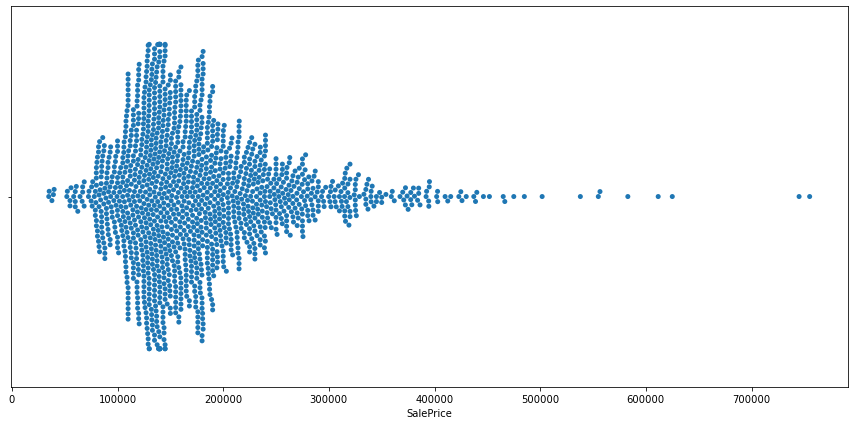

In [4]:
fig= plt.figure(figsize=(15,7))
sns.swarmplot(hp['SalePrice'])

In [5]:
np.zeros_like(4)

array(0)

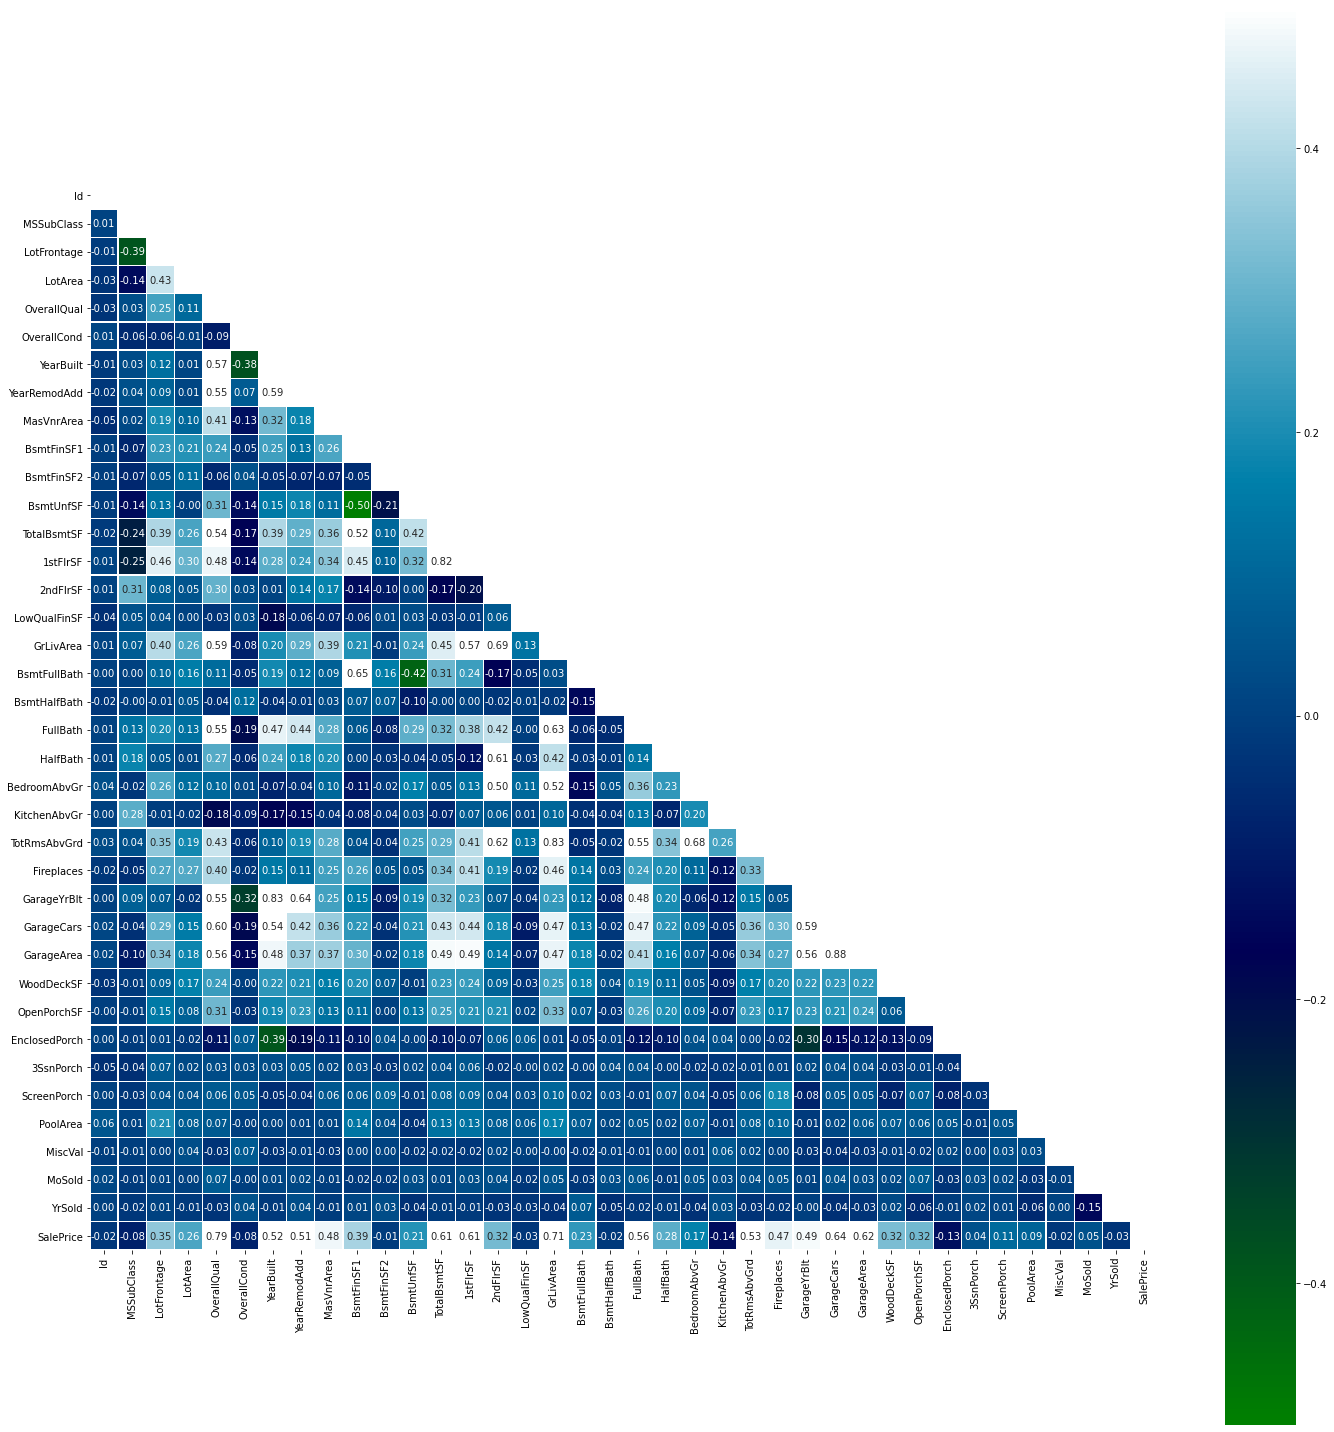

In [6]:
fig=plt.figure(figsize=(20,20))
correlation =hp.corr()
mask=np.zeros_like(correlation)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(hp._get_numeric_data().astype(float).corr(), annot=True, square=True,linewidths=0.2,fmt='.2f',
            center=0, vmin=-0.5,vmax=0.5,mask=mask,cmap="ocean").figure.tight_layout()


In [7]:
target= hp['SalePrice']
hp.drop(['Id','SalePrice'],axis=1,inplace=True)

<AxesSubplot:>

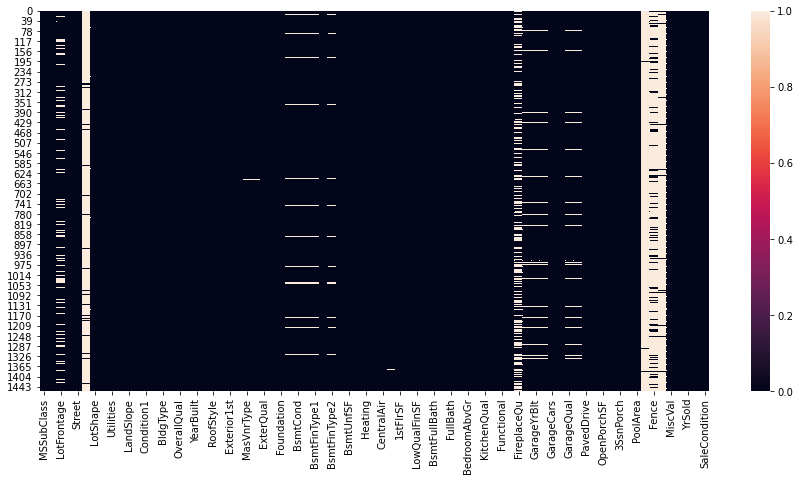

In [8]:
fig=plt.figure(figsize=(15,7))
sns.heatmap(hp.isnull())

In [9]:
hp.isnull().sum() 

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [10]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
Counter(hp['MSZoning'])

Counter({'RL': 1151, 'RM': 218, 'C (all)': 10, 'FV': 65, 'RH': 16})

In [12]:
hp.select_dtypes('object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
data = hp.copy()

In [14]:
data.select_dtypes('object').loc[ :,data.isnull().sum()>0].columns # home work

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [15]:
for col in data.select_dtypes('object').columns:
    print('num of unique value {} \n {}  column {} \n {}'.format(len(data[col].unique()),
          col,data[col].unique(),data[col].value_counts()))
    print("#"*10)


num of unique value 5 
 MSZoning  column ['RL' 'RM' 'C (all)' 'FV' 'RH'] 
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
##########
num of unique value 2 
 Street  column ['Pave' 'Grvl'] 
 Pave    1454
Grvl       6
Name: Street, dtype: int64
##########
num of unique value 3 
 Alley  column [nan 'Grvl' 'Pave'] 
 Grvl    50
Pave    41
Name: Alley, dtype: int64
##########
num of unique value 4 
 LotShape  column ['Reg' 'IR1' 'IR2' 'IR3'] 
 Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
##########
num of unique value 4 
 LandContour  column ['Lvl' 'Bnk' 'Low' 'HLS'] 
 Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
##########
num of unique value 2 
 Utilities  column ['AllPub' 'NoSeWa'] 
 AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
##########
num of unique value 5 
 LotConfig  column ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 
 Inside     1052
Corner      

num of unique value 6 
 SaleCondition  column ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family'] 
 Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
##########


In [16]:
for col in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'GarageType', 
    'GarageFinish', 
    'GarageQual', 
    'GarageCond', 
    'PoolQC',
    'MiscFeature',
    'Fence',
    'FireplaceQu'
    
]:
    data[col]= data[col].fillna('NA') # not actual missing values
for col in [ 
    'MasVnrType',
    'Electrical'
]:
    data[col]= data[col].fillna(data[col].mode()[0]) #actual missing values,0 is a place using to fill

In [17]:
data.select_dtypes('object').loc[ :,data.isnull().sum()>0].columns

Index([], dtype='object')

<AxesSubplot:>

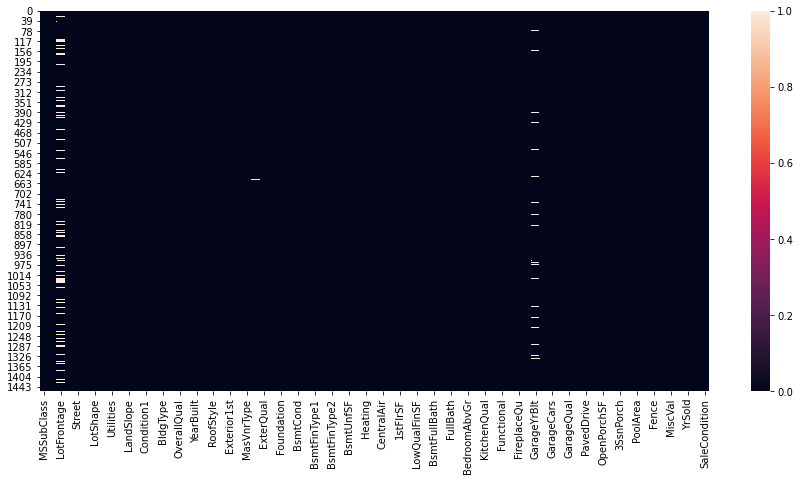

In [18]:
fig=plt.figure(figsize=(15,7))
sns.heatmap(data.isnull())

In [19]:
#numerical data
import numpy as np

In [20]:
data.select_dtypes(np.number).loc[ :,data.isnull().sum()>0].columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [21]:
data1=data.copy()

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
data1.select_dtypes(np.number).loc[:,data1.isna().sum()==0]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,0,150,856,...,548,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,486,0,434,920,...,608,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,216,0,540,756,...,642,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,460,0,40,0,0,0,0,0,8,2007
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,500,349,0,0,0,0,0,0,2,2010
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,240,366,0,112,0,0,0,0,4,2010


In [24]:
data1['LotFrontage'].loc[data1['LotFrontage'].isna()==False]

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1201, dtype: float64

In [25]:
def knn_missing_value_imputer(data, null_tagret):
    data=data.copy()
    
    numeric_data = data.select_dtypes(np.number)
    non_null_columns= numeric_data.loc[:, numeric_data.isna().sum()==0].columns
    
    x_train=numeric_data.loc[numeric_data[null_tagret].isna()==False,non_null_columns ]
    y_train=numeric_data.loc[numeric_data[null_tagret].isna()==False, null_tagret]
    x_test=numeric_data.loc[numeric_data[null_tagret].isna()==True, non_null_columns]
    
    knn=KNeighborsRegressor()
    knn.fit(x_train, y_train)
    
    y_prediction=knn.predict(x_test)
    data.loc[data[null_tagret].isna()==True, null_tagret]=y_prediction
        
    return data
    

In [26]:
data1.loc[:, data1.isnull().sum()>0].columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [27]:
for col in [
    'LotFrontage',
    'MasVnrArea',
    'GarageYrBlt'
]:
    data1=knn_missing_value_imputer(data1, col)

In [28]:
data1.loc[:, data1.isnull().sum()>0].columns

Index([], dtype='object')

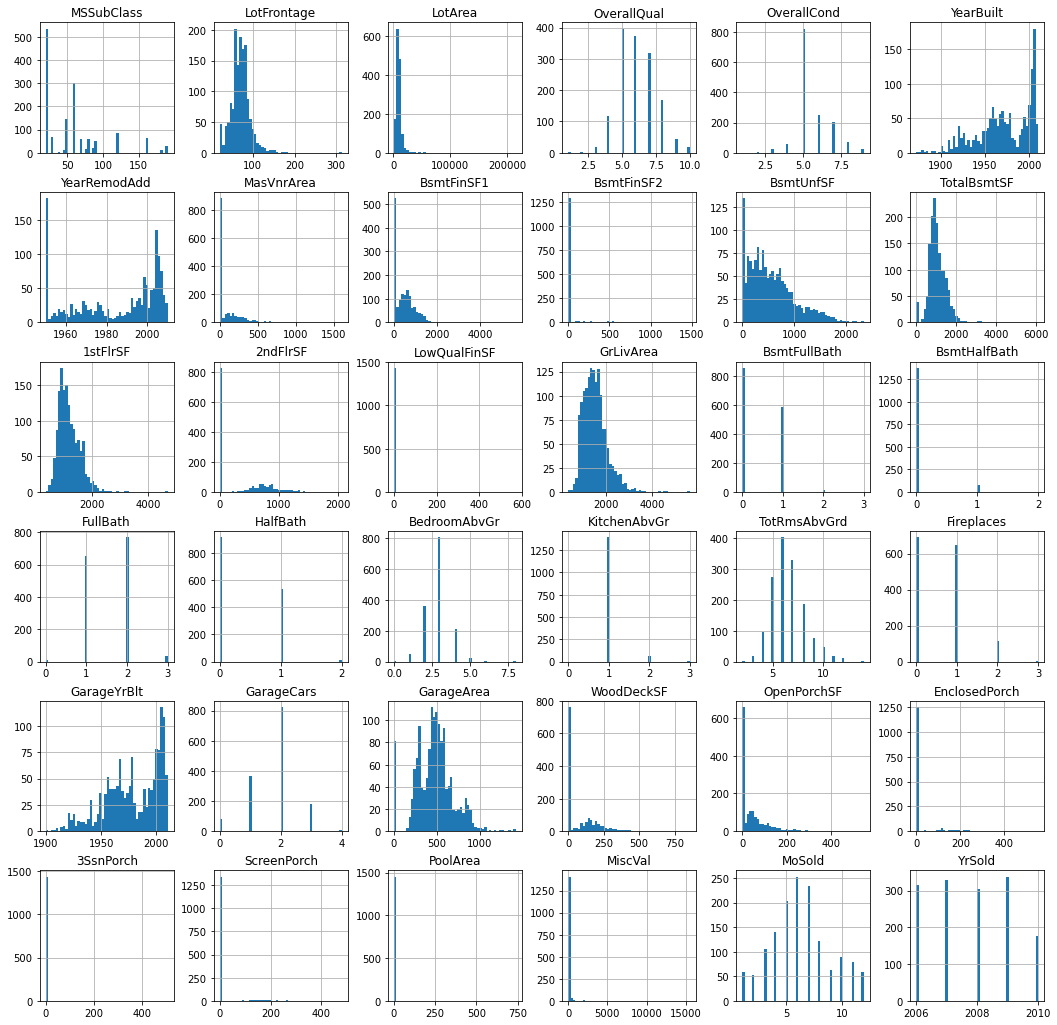

In [29]:
_=data1.hist(bins=50, figsize=(18,18))

In [30]:
data2=data1.copy()

In [31]:
import scipy.stats

In [32]:
skew_data = pd.DataFrame(data2.select_dtypes(np.number).columns,columns = ["Features"])
skew_data['skew']=skew_data['Features'].apply(lambda feature: scipy.stats.skew(data2[feature])) # we use lambda function for a single line code
skew_data['absolute skew']=skew_data['skew'].apply(abs)
skew_data['skewed']=skew_data['absolute skew'].apply(lambda X: True if X>0.5 else False)
skew_data

,Features,skew,absolute skew,skewed
0,MSSubClass,1.406210,1.406210,True
1,LotFrontage,1.914077,1.914077,True
2,LotArea,12.195142,12.195142,True
3,OverallQual,0.216721,0.216721,False
4,OverallCond,0.692355,0.692355,True
5,YearBuilt,-0.612831,0.612831,True
6,YearRemodAdd,-0.503044,0.503044,True
7,MasVnrArea,2.649104,2.649104,True
8,BsmtFinSF1,1.683771,1.683771,True
9,BsmtFinSF2,4.250888,4.250888,True


In [33]:
data2[skew_data.query('skewed==True')['Features'].values].describe()

,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.970137,10516.828082,5.575342,1971.267808,1984.865753,104.274795,443.639726,46.549315,567.240411,...,6.517808,0.613014,1977.577808,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
std,42.300571,23.745260,9981.264932,1.112799,30.202904,20.645407,181.315123,456.098091,161.319273,441.866955,...,1.625393,0.644666,24.578136,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
min,20.000000,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,5.000000,0.000000,1960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,70.000000,9478.500000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,6.000000,1.000000,1978.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,81.600000,11601.500000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,7.000000,1.000000,2001.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,190.000000,313.000000,215245.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,14.000000,3.000000,2010.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


In [34]:
for col in skew_data.query('skewed==True')['Features'].values:
    data2[col]= np.log1p(data2[col])

In [35]:
skew_data = pd.DataFrame(data2.select_dtypes(np.number).columns,columns = ["Features"])
skew_data['skew']=skew_data['Features'].apply(lambda feature: scipy.stats.skew(data2[feature]))
skew_data['absolute skew']=skew_data['skew'].apply(abs)
skew_data['skewed']=skew_data['absolute skew'].apply(lambda X: True if X>0.5 else False)
skew_data

,Features,skew,absolute skew,skewed
0,MSSubClass,0.248741,0.248741,False
1,LotFrontage,-0.788547,0.788547,True
2,LotArea,-0.137263,0.137263,False
3,OverallQual,0.216721,0.216721,False
4,OverallCond,-0.253754,0.253754,False
5,YearBuilt,-0.640470,0.640470,True
6,YearRemodAdd,-0.510480,0.510480,True
7,MasVnrArea,0.483632,0.483632,False
8,BsmtFinSF1,-0.617774,0.617774,True
9,BsmtFinSF2,2.521100,2.521100,True


In [36]:
data2['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [37]:
data2['MoSold']= (-np.cos(0.53*data2['MoSold']))


In [38]:
data2['MoSold']

0      -0.488872
1       0.881582
2      -0.057579
3      -0.488872
4      -0.997051
          ...   
1455    0.455015
1456   -0.488872
1457    0.881582
1458    0.522008
1459    0.999263
Name: MoSold, Length: 1460, dtype: float64

In [39]:
np.min(target),np.max(target)

(34900, 755000)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


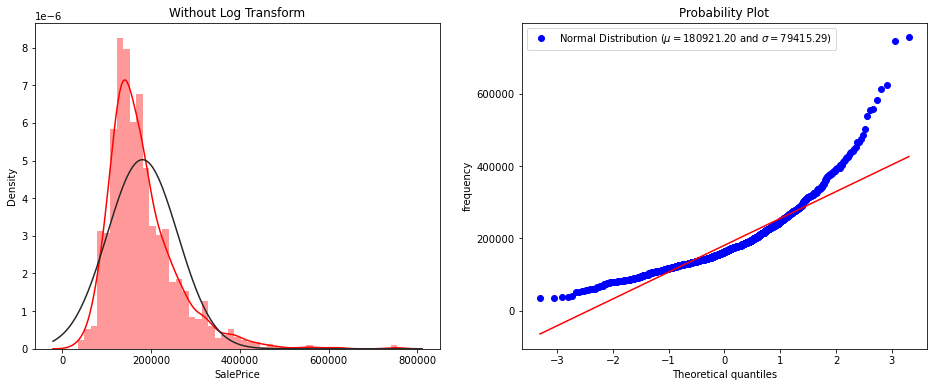

In [40]:
fig =plt.figure(figsize=(16,6))
                
plt.subplot(1,2,1)
sns.distplot(target, kde=True, fit=scipy.stats.norm, color = 'r')     #kde=kind          
plt.title('Without Log Transform')

plt.subplot(1,2,2)
(mu,sigma)= scipy.stats.norm.fit(target)
scipy.stats.probplot(target,plot=plt)
plt.legend(['Normal Distribution ($\mu=${:.2f} and $\sigma=${:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('frequency')
                
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


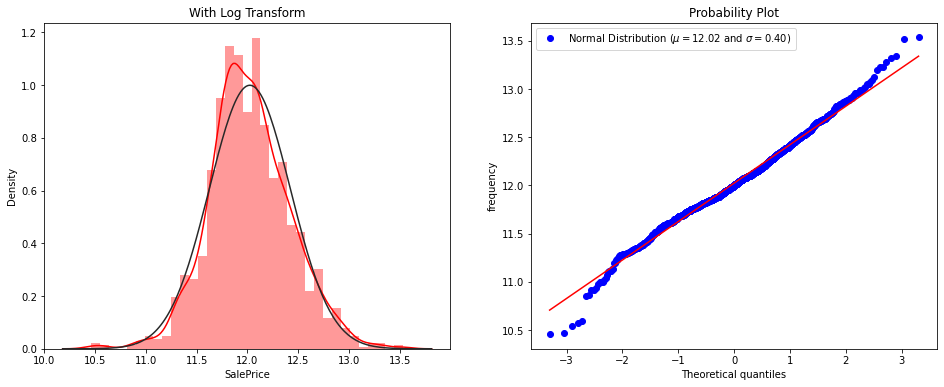

In [41]:
fig =plt.figure(figsize=(16,6))
                
plt.subplot(1,2,1)
sns.distplot(np.log1p(target), kde=True, fit=scipy.stats.norm, color = 'r')     #kde=kind          
plt.title('With Log Transform')

plt.subplot(1,2,2)
(mu,sigma)= scipy.stats.norm.fit(np.log1p(target))
scipy.stats.probplot(np.log1p(target),plot=plt)
plt.legend(['Normal Distribution ($\mu=${:.2f} and $\sigma=${:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('frequency')
                
plt.show()

In [42]:
data3=data2.copy()

In [43]:
data3=pd.get_dummies(data3).reset_index(drop=True)

In [44]:
data3.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,1.791759,7.602900,7.602900,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,2.197225,7.589336,7.589336,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,1.791759,7.601902,7.602401,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,1.791759,7.557995,7.586296,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,1.791759,7.601402,7.601402,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0


In [45]:
data4=data3.copy()

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
Scaler=StandardScaler()
Scaler.fit(data4)

StandardScaler()

In [48]:
 data4=pd.DataFrame(Scaler.transform(data4),index=data4.index,columns=data4.columns)

In [49]:
data4.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.424462,-0.096477,-0.133270,0.651479,-0.460408,1.045180,0.877541,1.192009,0.779431,-0.355342,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-1.125202,0.506497,0.113413,-0.071836,1.948163,0.163445,-0.424186,-0.814750,0.888257,-0.355342,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.424462,0.034402,0.420049,0.651479,-0.460408,0.980275,0.829642,1.120048,0.654803,-0.355342,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.645073,-0.328431,0.103317,0.651479,-0.460408,-1.873790,-0.715872,-0.814750,0.384539,-0.355342,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.424462,0.648418,0.878431,1.374795,-0.460408,0.947798,0.733773,1.411397,0.754400,-0.355342,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [50]:
x=data4
y=np.log1p(target)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1168, 302), (292, 302), (1168,), (292,))

In [54]:
x_train1 = pd.DataFrame(x_train)
y_train1 = pd.DataFrame(y_train)

In [56]:
from pycaret.regression import *

In [57]:
setup(pd.concat([x_train1,y_train1],axis=1),target='SalePrice')

,Description,Value
0,session_id,3518
1,Target,SalePrice
2,Original Data,"(1168, 303)"
3,Missing Values,False
4,Numeric Features,48
5,Categorical Features,254
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(817, 283)"


('48b0',
 False,
 [],
 False,
       MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
 503    -1.125202     1.156218  1.052322     0.651479     1.948163  -0.397922   
 455    -1.125202     0.506497  0.113413     0.651479     0.455288   0.064732   
 681     0.164262    -0.580233 -1.351358    -0.795151    -0.460408  -1.299589   
 444     0.424462     0.118530 -0.065823     0.651479    -0.460408   0.752595   
 116    -1.125202     0.790421  0.481946    -0.795151    -0.460408  -0.298504   
 ...          ...          ...       ...          ...          ...        ...   
 1346   -1.125202     0.126812  1.606515     0.651479     1.248500  -0.100124   
 552    -1.125202     0.750543  0.402093     1.374795    -0.460408   1.142417   
 1235    0.645073     1.037240  0.719109    -0.795151    -0.460408  -1.907725   
 741    -1.125202    -0.096477 -0.562379    -0.071836     1.948163  -0.331626   
 574     0.836565     0.118530  0.286662    -0.795151     1.248500  -0.001160  

In [58]:
compare_models(exclude = ['lar'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0820,0.0148,0.1192,0.8971,0.0092,0.0069,0.1110
catboost,CatBoost Regressor,0.0821,0.0151,0.1216,0.8953,0.0094,0.0069,20.2110
ridge,Ridge Regression,0.0835,0.0153,0.1215,0.8936,0.0094,0.0070,0.0410
gbr,Gradient Boosting Regressor,0.0892,0.0168,0.1285,0.8837,0.0099,0.0075,0.4770
lightgbm,Light Gradient Boosting Machine,0.0914,0.0177,0.1323,0.8786,0.0102,0.0076,0.4840
huber,Huber Regressor,0.0915,0.0187,0.1352,0.8709,0.0105,0.0077,0.2940
xgboost,Extreme Gradient Boosting,0.0971,0.0192,0.1378,0.8679,0.0107,0.0081,1.5430
omp,Orthogonal Matching Pursuit,0.0941,0.0194,0.1361,0.8653,0.0105,0.0079,0.0310
rf,Random Forest Regressor,0.1008,0.0211,0.1447,0.8553,0.0112,0.0084,1.2210
et,Extra Trees Regressor,0.1003,0.0218,0.1469,0.8498,0.0114,0.0084,1.4420


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [67]:
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [68]:
models = {
    "catboost": CatBoostRegressor(),
    "Bayesian Ridge": BayesianRidge(),
    "light gbm": LGBMRegressor(),
    "ridge " : Ridge(),
    "Gradient Boosting" : GradientBoostingRegressor(),
    "Xgboost" : XGBRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "KNeighbor": KNeighborsRegressor()
}

In [71]:
# Preprocessing, fitting, making predictions and scoring for every model:
# We used without tuning Algorithm,For prediction:
models_data = {'R^2':{},
               'Adjusted R^2':{},
               'MAE':{},
               'MSE':{},
               'RMSE':{}}

p = data4.shape[1]
train_n = x_train.shape[0]

for name in models:
    #fitting the model
    model = models[name].fit(x_train, y_train)    
    y_pred = model.predict(x_test)
    
    #calculate the R-Squared for training and testing
    r2_score_value = r2_score(y_test,y_pred)
    models_data['R^2'][name]= r2_score_value
    
     #calculate the Adjusted R-Squared for training and testing
    adj_r2_score= (1-(1-r2_score_value)*(train_n-1)/(train_n-p-1))
    models_data['Adjusted R^2'][name] = adj_r2_score

    #calculate the Mean absolute error for training and testing
    MAE_value = mean_absolute_error(y_test, y_pred)         
    models_data['MAE'][name] = MAE_value
               
    #calculate Mean square error for training and testing
    MSE_value= mean_squared_error(y_test, y_pred)
    models_data['MSE'][name]= MSE_value

    #calculate Root mean error for training and testing    
    RMSE_value = np.sqrt(MSE_value)
    models_data['RMSE'][name]= RMSE_value
        
        
    print('\n========================={}========================='.format(name))
    print('******************************************************')
    print('R^2    : ',r2_score_value) 
    print('Adj R^2: ',adj_r2_score) 
    print('MAE    : ',MAE_value) 
    print('MSE    : ',MSE_value) 
    print('RMSE   : ',RMSE_value)   

Learning rate set to 0.040124
0:	learn: 0.3804632	total: 157ms	remaining: 2m 36s
1:	learn: 0.3712727	total: 168ms	remaining: 1m 24s
2:	learn: 0.3620614	total: 181ms	remaining: 60s
3:	learn: 0.3533201	total: 200ms	remaining: 49.7s
4:	learn: 0.3453711	total: 216ms	remaining: 43s
5:	learn: 0.3369297	total: 231ms	remaining: 38.3s
6:	learn: 0.3288686	total: 252ms	remaining: 35.7s
7:	learn: 0.3218648	total: 264ms	remaining: 32.8s
8:	learn: 0.3138199	total: 277ms	remaining: 30.5s
9:	learn: 0.3071823	total: 291ms	remaining: 28.8s
10:	learn: 0.3016539	total: 303ms	remaining: 27.2s
11:	learn: 0.2948467	total: 314ms	remaining: 25.9s
12:	learn: 0.2883545	total: 327ms	remaining: 24.8s
13:	learn: 0.2818537	total: 339ms	remaining: 23.9s
14:	learn: 0.2760478	total: 352ms	remaining: 23.1s
15:	learn: 0.2707648	total: 370ms	remaining: 22.7s
16:	learn: 0.2655711	total: 393ms	remaining: 22.7s
17:	learn: 0.2603569	total: 409ms	remaining: 22.3s
18:	learn: 0.2555219	total: 422ms	remaining: 21.8s
19:	learn: 0.

172:	learn: 0.0981613	total: 2.52s	remaining: 12.1s
173:	learn: 0.0979664	total: 2.54s	remaining: 12s
174:	learn: 0.0977544	total: 2.55s	remaining: 12s
175:	learn: 0.0974842	total: 2.58s	remaining: 12.1s
176:	learn: 0.0973183	total: 2.62s	remaining: 12.2s
177:	learn: 0.0971214	total: 2.64s	remaining: 12.2s
178:	learn: 0.0969699	total: 2.68s	remaining: 12.3s
179:	learn: 0.0967212	total: 2.7s	remaining: 12.3s
180:	learn: 0.0966185	total: 2.72s	remaining: 12.3s
181:	learn: 0.0964474	total: 2.75s	remaining: 12.4s
182:	learn: 0.0963423	total: 2.77s	remaining: 12.4s
183:	learn: 0.0960997	total: 2.8s	remaining: 12.4s
184:	learn: 0.0959400	total: 2.83s	remaining: 12.5s
185:	learn: 0.0957186	total: 2.84s	remaining: 12.4s
186:	learn: 0.0955613	total: 2.87s	remaining: 12.5s
187:	learn: 0.0952858	total: 2.9s	remaining: 12.5s
188:	learn: 0.0950886	total: 2.93s	remaining: 12.6s
189:	learn: 0.0949341	total: 2.96s	remaining: 12.6s
190:	learn: 0.0948733	total: 2.98s	remaining: 12.6s
191:	learn: 0.09464

337:	learn: 0.0733677	total: 4.66s	remaining: 9.13s
338:	learn: 0.0732721	total: 4.67s	remaining: 9.11s
339:	learn: 0.0731639	total: 4.69s	remaining: 9.1s
340:	learn: 0.0730920	total: 4.7s	remaining: 9.08s
341:	learn: 0.0730237	total: 4.71s	remaining: 9.06s
342:	learn: 0.0728963	total: 4.72s	remaining: 9.04s
343:	learn: 0.0727602	total: 4.73s	remaining: 9.02s
344:	learn: 0.0726193	total: 4.74s	remaining: 9s
345:	learn: 0.0725167	total: 4.75s	remaining: 8.98s
346:	learn: 0.0723897	total: 4.77s	remaining: 8.98s
347:	learn: 0.0722930	total: 4.8s	remaining: 8.99s
348:	learn: 0.0721598	total: 4.83s	remaining: 9s
349:	learn: 0.0720778	total: 4.85s	remaining: 9.01s
350:	learn: 0.0719454	total: 4.86s	remaining: 8.99s
351:	learn: 0.0717788	total: 4.88s	remaining: 8.98s
352:	learn: 0.0716615	total: 4.9s	remaining: 8.99s
353:	learn: 0.0714641	total: 4.92s	remaining: 8.98s
354:	learn: 0.0713646	total: 4.94s	remaining: 8.98s
355:	learn: 0.0712951	total: 4.96s	remaining: 8.97s
356:	learn: 0.0711615	

499:	learn: 0.0586701	total: 6.81s	remaining: 6.81s
500:	learn: 0.0585754	total: 6.82s	remaining: 6.8s
501:	learn: 0.0585400	total: 6.84s	remaining: 6.78s
502:	learn: 0.0584635	total: 6.85s	remaining: 6.77s
503:	learn: 0.0583631	total: 6.86s	remaining: 6.75s
504:	learn: 0.0582928	total: 6.87s	remaining: 6.73s
505:	learn: 0.0582120	total: 6.88s	remaining: 6.72s
506:	learn: 0.0581625	total: 6.89s	remaining: 6.7s
507:	learn: 0.0581528	total: 6.9s	remaining: 6.68s
508:	learn: 0.0580629	total: 6.91s	remaining: 6.67s
509:	learn: 0.0580298	total: 6.92s	remaining: 6.65s
510:	learn: 0.0579331	total: 6.93s	remaining: 6.63s
511:	learn: 0.0578789	total: 6.94s	remaining: 6.62s
512:	learn: 0.0577512	total: 6.95s	remaining: 6.6s
513:	learn: 0.0576768	total: 6.96s	remaining: 6.58s
514:	learn: 0.0576240	total: 6.97s	remaining: 6.57s
515:	learn: 0.0575495	total: 6.99s	remaining: 6.56s
516:	learn: 0.0574664	total: 7s	remaining: 6.54s
517:	learn: 0.0574547	total: 7.01s	remaining: 6.53s
518:	learn: 0.05735

668:	learn: 0.0487193	total: 8.59s	remaining: 4.25s
669:	learn: 0.0486427	total: 8.6s	remaining: 4.24s
670:	learn: 0.0485945	total: 8.61s	remaining: 4.22s
671:	learn: 0.0485506	total: 8.63s	remaining: 4.21s
672:	learn: 0.0485224	total: 8.63s	remaining: 4.2s
673:	learn: 0.0485156	total: 8.64s	remaining: 4.18s
674:	learn: 0.0484337	total: 8.65s	remaining: 4.17s
675:	learn: 0.0483841	total: 8.66s	remaining: 4.15s
676:	learn: 0.0482826	total: 8.67s	remaining: 4.14s
677:	learn: 0.0482123	total: 8.68s	remaining: 4.12s
678:	learn: 0.0481374	total: 8.69s	remaining: 4.11s
679:	learn: 0.0480768	total: 8.7s	remaining: 4.1s
680:	learn: 0.0479747	total: 8.71s	remaining: 4.08s
681:	learn: 0.0479127	total: 8.72s	remaining: 4.07s
682:	learn: 0.0479039	total: 8.73s	remaining: 4.05s
683:	learn: 0.0478534	total: 8.74s	remaining: 4.04s
684:	learn: 0.0478351	total: 8.75s	remaining: 4.03s
685:	learn: 0.0478288	total: 8.77s	remaining: 4.01s
686:	learn: 0.0477792	total: 8.78s	remaining: 4s
687:	learn: 0.04773

836:	learn: 0.0407551	total: 10.4s	remaining: 2.02s
837:	learn: 0.0406858	total: 10.4s	remaining: 2s
838:	learn: 0.0406744	total: 10.4s	remaining: 1.99s
839:	learn: 0.0406237	total: 10.4s	remaining: 1.98s
840:	learn: 0.0406170	total: 10.4s	remaining: 1.97s
841:	learn: 0.0405598	total: 10.4s	remaining: 1.96s
842:	learn: 0.0405047	total: 10.5s	remaining: 1.95s
843:	learn: 0.0404496	total: 10.5s	remaining: 1.94s
844:	learn: 0.0404185	total: 10.5s	remaining: 1.93s
845:	learn: 0.0403857	total: 10.5s	remaining: 1.92s
846:	learn: 0.0403197	total: 10.6s	remaining: 1.91s
847:	learn: 0.0403026	total: 10.6s	remaining: 1.9s
848:	learn: 0.0402470	total: 10.6s	remaining: 1.89s
849:	learn: 0.0402326	total: 10.6s	remaining: 1.87s
850:	learn: 0.0401952	total: 10.6s	remaining: 1.86s
851:	learn: 0.0401911	total: 10.7s	remaining: 1.85s
852:	learn: 0.0401220	total: 10.7s	remaining: 1.84s
853:	learn: 0.0400654	total: 10.7s	remaining: 1.83s
854:	learn: 0.0400359	total: 10.7s	remaining: 1.82s
855:	learn: 0.03


=========================catboost=========================
******************************************************
R^2    :  0.9123381077234054
Adj R^2:  0.8817324528476463
MAE    :  0.08425579894204793
MSE    :  0.016358672379320465
RMSE   :  0.1279010257164518

=========================Bayesian Ridge=========================
******************************************************
R^2    :  0.9161637633329318
Adj R^2:  0.886893770878071
MAE    :  0.08622545452033446
MSE    :  0.01564476300402559
RMSE   :  0.1250790270350133

=========================light gbm=========================
******************************************************
R^2    :  0.8968317795936829
Adj R^2:  0.8608123546656969
MAE    :  0.09033870601360561
MSE    :  0.01925232360099389
RMSE   :  0.13875274267917692

=========================ridge =========================
******************************************************
R^2    :  0.9174744216298795
Adj R^2:  0.8886620231700224
MAE    :  0.08352167180522711
MSE  

In [72]:
Score_value = pd.DataFrame(models_data)

In [73]:
Score_value #ridge Is the Best Algorithm

,R^2,Adjusted R^2,MAE,MSE,RMSE
catboost,0.912338,0.881732,0.084256,0.016359,0.127901
Bayesian Ridge,0.916164,0.886894,0.086225,0.015645,0.125079
light gbm,0.896832,0.860812,0.090339,0.019252,0.138753
ridge,0.917474,0.888662,0.083522,0.015400,0.124097
Gradient Boosting,0.903105,0.869276,0.092315,0.018082,0.134468
Xgboost,0.872244,0.827640,0.098521,0.023841,0.154404
Random Forest,0.883984,0.843479,0.097330,0.021650,0.147139
Decision Tree,0.809183,0.742562,0.137787,0.035609,0.188702
KNeighbor,0.773368,0.694243,0.139913,0.042292,0.205650


In [75]:
r_2_results = {'R-Squared':{},'Mean':{},'std':{}}   
rmse_results = {'RMSE':{},'Mean':{},'std':{}}

n_folds = 5
kfold = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)

for name in models:
    model = models[name]
    r_2 = cross_val_score(model, x_train, y_train, scoring='r2', cv=kfold)   #R-Squared 
    rms = np.sqrt(-cross_val_score(model,x_train , y_train, cv=kfold,        #RMSE
                                   scoring='neg_mean_squared_error'))
    
    #save the R-Squared reults
    r_2_results['R-Squared'][name] = r_2
    r_2_results['Mean'][name] = r_2.mean()
    r_2_results['std'][name] = r_2.std()
    
    #save the RMSE reults
    rmse_results['RMSE'][name] = rms
    rmse_results['Mean'][name] = rms.mean()
    rmse_results['std'][name] = rms.std()

Learning rate set to 0.038559
0:	learn: 0.3826342	total: 20ms	remaining: 20s
1:	learn: 0.3741128	total: 37ms	remaining: 18.5s
2:	learn: 0.3662071	total: 52.2ms	remaining: 17.3s
3:	learn: 0.3571829	total: 65ms	remaining: 16.2s
4:	learn: 0.3493412	total: 76ms	remaining: 15.1s
5:	learn: 0.3410045	total: 87.1ms	remaining: 14.4s
6:	learn: 0.3334207	total: 98.1ms	remaining: 13.9s
7:	learn: 0.3267936	total: 115ms	remaining: 14.3s
8:	learn: 0.3201625	total: 126ms	remaining: 13.9s
9:	learn: 0.3134479	total: 137ms	remaining: 13.6s
10:	learn: 0.3071575	total: 148ms	remaining: 13.3s
11:	learn: 0.3004234	total: 159ms	remaining: 13.1s
12:	learn: 0.2944988	total: 170ms	remaining: 12.9s
13:	learn: 0.2889212	total: 181ms	remaining: 12.8s
14:	learn: 0.2838487	total: 196ms	remaining: 12.9s
15:	learn: 0.2780423	total: 213ms	remaining: 13.1s
16:	learn: 0.2723446	total: 231ms	remaining: 13.4s
17:	learn: 0.2668602	total: 243ms	remaining: 13.3s
18:	learn: 0.2617685	total: 254ms	remaining: 13.1s
19:	learn: 0.2

173:	learn: 0.0976737	total: 2.37s	remaining: 11.2s
174:	learn: 0.0974409	total: 2.38s	remaining: 11.2s
175:	learn: 0.0971100	total: 2.4s	remaining: 11.2s
176:	learn: 0.0968607	total: 2.41s	remaining: 11.2s
177:	learn: 0.0966533	total: 2.42s	remaining: 11.2s
178:	learn: 0.0963849	total: 2.43s	remaining: 11.1s
179:	learn: 0.0961634	total: 2.44s	remaining: 11.1s
180:	learn: 0.0958124	total: 2.45s	remaining: 11.1s
181:	learn: 0.0956283	total: 2.46s	remaining: 11.1s
182:	learn: 0.0954754	total: 2.47s	remaining: 11s
183:	learn: 0.0952534	total: 2.48s	remaining: 11s
184:	learn: 0.0950620	total: 2.5s	remaining: 11s
185:	learn: 0.0948716	total: 2.51s	remaining: 11s
186:	learn: 0.0946683	total: 2.52s	remaining: 10.9s
187:	learn: 0.0944174	total: 2.53s	remaining: 10.9s
188:	learn: 0.0941023	total: 2.54s	remaining: 10.9s
189:	learn: 0.0938560	total: 2.56s	remaining: 10.9s
190:	learn: 0.0936904	total: 2.57s	remaining: 10.9s
191:	learn: 0.0934097	total: 2.58s	remaining: 10.8s
192:	learn: 0.0932519	

332:	learn: 0.0734920	total: 4.35s	remaining: 8.72s
333:	learn: 0.0734140	total: 4.37s	remaining: 8.71s
334:	learn: 0.0733250	total: 4.39s	remaining: 8.71s
335:	learn: 0.0731874	total: 4.42s	remaining: 8.73s
336:	learn: 0.0730469	total: 4.43s	remaining: 8.72s
337:	learn: 0.0730299	total: 4.46s	remaining: 8.73s
338:	learn: 0.0729151	total: 4.48s	remaining: 8.74s
339:	learn: 0.0728281	total: 4.5s	remaining: 8.74s
340:	learn: 0.0727366	total: 4.53s	remaining: 8.76s
341:	learn: 0.0726110	total: 4.56s	remaining: 8.78s
342:	learn: 0.0724876	total: 4.58s	remaining: 8.78s
343:	learn: 0.0723676	total: 4.61s	remaining: 8.78s
344:	learn: 0.0723509	total: 4.63s	remaining: 8.79s
345:	learn: 0.0721908	total: 4.65s	remaining: 8.78s
346:	learn: 0.0721483	total: 4.67s	remaining: 8.79s
347:	learn: 0.0720613	total: 4.69s	remaining: 8.79s
348:	learn: 0.0720038	total: 4.71s	remaining: 8.79s
349:	learn: 0.0718767	total: 4.74s	remaining: 8.79s
350:	learn: 0.0717972	total: 4.76s	remaining: 8.8s
351:	learn: 0.

496:	learn: 0.0578808	total: 7.9s	remaining: 8s
497:	learn: 0.0578249	total: 7.92s	remaining: 7.98s
498:	learn: 0.0577405	total: 7.93s	remaining: 7.96s
499:	learn: 0.0576475	total: 7.95s	remaining: 7.95s
500:	learn: 0.0575610	total: 7.96s	remaining: 7.92s
501:	learn: 0.0574776	total: 7.97s	remaining: 7.91s
502:	learn: 0.0574083	total: 7.99s	remaining: 7.89s
503:	learn: 0.0573385	total: 8s	remaining: 7.87s
504:	learn: 0.0572493	total: 8.01s	remaining: 7.85s
505:	learn: 0.0571289	total: 8.02s	remaining: 7.83s
506:	learn: 0.0570763	total: 8.03s	remaining: 7.81s
507:	learn: 0.0569678	total: 8.05s	remaining: 7.79s
508:	learn: 0.0568980	total: 8.06s	remaining: 7.78s
509:	learn: 0.0567951	total: 8.08s	remaining: 7.76s
510:	learn: 0.0567187	total: 8.09s	remaining: 7.74s
511:	learn: 0.0565622	total: 8.1s	remaining: 7.72s
512:	learn: 0.0564541	total: 8.11s	remaining: 7.7s
513:	learn: 0.0563445	total: 8.12s	remaining: 7.68s
514:	learn: 0.0563172	total: 8.13s	remaining: 7.66s
515:	learn: 0.0562114

666:	learn: 0.0466585	total: 10s	remaining: 5.01s
667:	learn: 0.0465999	total: 10s	remaining: 4.99s
668:	learn: 0.0465193	total: 10.1s	remaining: 4.98s
669:	learn: 0.0464526	total: 10.1s	remaining: 4.96s
670:	learn: 0.0464438	total: 10.1s	remaining: 4.95s
671:	learn: 0.0463392	total: 10.1s	remaining: 4.93s
672:	learn: 0.0463046	total: 10.1s	remaining: 4.91s
673:	learn: 0.0462792	total: 10.1s	remaining: 4.89s
674:	learn: 0.0462592	total: 10.1s	remaining: 4.88s
675:	learn: 0.0461820	total: 10.1s	remaining: 4.86s
676:	learn: 0.0461062	total: 10.2s	remaining: 4.84s
677:	learn: 0.0460635	total: 10.2s	remaining: 4.83s
678:	learn: 0.0459948	total: 10.2s	remaining: 4.81s
679:	learn: 0.0459559	total: 10.2s	remaining: 4.79s
680:	learn: 0.0458976	total: 10.2s	remaining: 4.78s
681:	learn: 0.0458909	total: 10.2s	remaining: 4.76s
682:	learn: 0.0458281	total: 10.2s	remaining: 4.75s
683:	learn: 0.0457647	total: 10.2s	remaining: 4.73s
684:	learn: 0.0456928	total: 10.2s	remaining: 4.71s
685:	learn: 0.04

825:	learn: 0.0390368	total: 11.9s	remaining: 2.52s
826:	learn: 0.0389554	total: 12s	remaining: 2.5s
827:	learn: 0.0389211	total: 12s	remaining: 2.49s
828:	learn: 0.0388698	total: 12s	remaining: 2.47s
829:	learn: 0.0387790	total: 12s	remaining: 2.46s
830:	learn: 0.0387169	total: 12s	remaining: 2.44s
831:	learn: 0.0386785	total: 12s	remaining: 2.43s
832:	learn: 0.0386118	total: 12s	remaining: 2.41s
833:	learn: 0.0385814	total: 12s	remaining: 2.4s
834:	learn: 0.0385587	total: 12s	remaining: 2.38s
835:	learn: 0.0384972	total: 12.1s	remaining: 2.37s
836:	learn: 0.0384889	total: 12.1s	remaining: 2.35s
837:	learn: 0.0384584	total: 12.1s	remaining: 2.33s
838:	learn: 0.0384045	total: 12.1s	remaining: 2.32s
839:	learn: 0.0383613	total: 12.1s	remaining: 2.31s
840:	learn: 0.0383238	total: 12.1s	remaining: 2.29s
841:	learn: 0.0382446	total: 12.1s	remaining: 2.28s
842:	learn: 0.0381778	total: 12.1s	remaining: 2.26s
843:	learn: 0.0381741	total: 12.2s	remaining: 2.25s
844:	learn: 0.0381536	total: 12.

994:	learn: 0.0320189	total: 14.1s	remaining: 70.7ms
995:	learn: 0.0320098	total: 14.1s	remaining: 56.6ms
996:	learn: 0.0319577	total: 14.1s	remaining: 42.4ms
997:	learn: 0.0319518	total: 14.1s	remaining: 28.3ms
998:	learn: 0.0319105	total: 14.1s	remaining: 14.1ms
999:	learn: 0.0318786	total: 14.1s	remaining: 0us
Learning rate set to 0.038559
0:	learn: 0.3830707	total: 24.8ms	remaining: 24.8s
1:	learn: 0.3735667	total: 37.7ms	remaining: 18.8s
2:	learn: 0.3653515	total: 50.8ms	remaining: 16.9s
3:	learn: 0.3567571	total: 62.4ms	remaining: 15.5s
4:	learn: 0.3489301	total: 73.6ms	remaining: 14.6s
5:	learn: 0.3403579	total: 93.3ms	remaining: 15.5s
6:	learn: 0.3332140	total: 104ms	remaining: 14.8s
7:	learn: 0.3259212	total: 118ms	remaining: 14.6s
8:	learn: 0.3186218	total: 132ms	remaining: 14.5s
9:	learn: 0.3116619	total: 144ms	remaining: 14.2s
10:	learn: 0.3050032	total: 156ms	remaining: 14s
11:	learn: 0.2985615	total: 169ms	remaining: 13.9s
12:	learn: 0.2925779	total: 185ms	remaining: 14s


158:	learn: 0.1007329	total: 1.98s	remaining: 10.5s
159:	learn: 0.1006086	total: 1.99s	remaining: 10.5s
160:	learn: 0.1003649	total: 2.01s	remaining: 10.5s
161:	learn: 0.1002614	total: 2.02s	remaining: 10.4s
162:	learn: 0.1000762	total: 2.03s	remaining: 10.4s
163:	learn: 0.0998985	total: 2.04s	remaining: 10.4s
164:	learn: 0.0995878	total: 2.06s	remaining: 10.4s
165:	learn: 0.0993915	total: 2.07s	remaining: 10.4s
166:	learn: 0.0990203	total: 2.08s	remaining: 10.4s
167:	learn: 0.0988777	total: 2.1s	remaining: 10.4s
168:	learn: 0.0986111	total: 2.11s	remaining: 10.4s
169:	learn: 0.0983703	total: 2.12s	remaining: 10.4s
170:	learn: 0.0980705	total: 2.13s	remaining: 10.3s
171:	learn: 0.0977763	total: 2.15s	remaining: 10.4s
172:	learn: 0.0974736	total: 2.17s	remaining: 10.4s
173:	learn: 0.0973268	total: 2.18s	remaining: 10.3s
174:	learn: 0.0970263	total: 2.19s	remaining: 10.3s
175:	learn: 0.0967849	total: 2.2s	remaining: 10.3s
176:	learn: 0.0965761	total: 2.21s	remaining: 10.3s
177:	learn: 0.

319:	learn: 0.0737389	total: 3.92s	remaining: 8.33s
320:	learn: 0.0735841	total: 3.93s	remaining: 8.32s
321:	learn: 0.0734958	total: 3.95s	remaining: 8.32s
322:	learn: 0.0733554	total: 3.96s	remaining: 8.31s
323:	learn: 0.0732708	total: 3.98s	remaining: 8.29s
324:	learn: 0.0730695	total: 3.99s	remaining: 8.28s
325:	learn: 0.0729325	total: 4s	remaining: 8.27s
326:	learn: 0.0727982	total: 4.01s	remaining: 8.26s
327:	learn: 0.0726344	total: 4.03s	remaining: 8.26s
328:	learn: 0.0725578	total: 4.04s	remaining: 8.25s
329:	learn: 0.0724383	total: 4.06s	remaining: 8.24s
330:	learn: 0.0723249	total: 4.07s	remaining: 8.23s
331:	learn: 0.0721674	total: 4.08s	remaining: 8.21s
332:	learn: 0.0720906	total: 4.11s	remaining: 8.22s
333:	learn: 0.0719670	total: 4.12s	remaining: 8.21s
334:	learn: 0.0718557	total: 4.13s	remaining: 8.2s
335:	learn: 0.0717104	total: 4.14s	remaining: 8.19s
336:	learn: 0.0715785	total: 4.16s	remaining: 8.18s
337:	learn: 0.0715173	total: 4.17s	remaining: 8.17s
338:	learn: 0.07

488:	learn: 0.0571712	total: 6.06s	remaining: 6.34s
489:	learn: 0.0571409	total: 6.08s	remaining: 6.33s
490:	learn: 0.0570200	total: 6.1s	remaining: 6.32s
491:	learn: 0.0568918	total: 6.11s	remaining: 6.31s
492:	learn: 0.0568489	total: 6.12s	remaining: 6.29s
493:	learn: 0.0567781	total: 6.13s	remaining: 6.28s
494:	learn: 0.0566759	total: 6.15s	remaining: 6.27s
495:	learn: 0.0565536	total: 6.16s	remaining: 6.26s
496:	learn: 0.0564420	total: 6.17s	remaining: 6.25s
497:	learn: 0.0563526	total: 6.19s	remaining: 6.24s
498:	learn: 0.0562709	total: 6.2s	remaining: 6.23s
499:	learn: 0.0562525	total: 6.21s	remaining: 6.21s
500:	learn: 0.0561888	total: 6.23s	remaining: 6.21s
501:	learn: 0.0561295	total: 6.25s	remaining: 6.2s
502:	learn: 0.0560742	total: 6.26s	remaining: 6.19s
503:	learn: 0.0559668	total: 6.27s	remaining: 6.17s
504:	learn: 0.0558731	total: 6.29s	remaining: 6.16s
505:	learn: 0.0557579	total: 6.3s	remaining: 6.15s
506:	learn: 0.0557464	total: 6.31s	remaining: 6.14s
507:	learn: 0.05

658:	learn: 0.0448041	total: 8.43s	remaining: 4.36s
659:	learn: 0.0447532	total: 8.45s	remaining: 4.35s
660:	learn: 0.0447175	total: 8.46s	remaining: 4.34s
661:	learn: 0.0446711	total: 8.47s	remaining: 4.33s
662:	learn: 0.0446311	total: 8.48s	remaining: 4.31s
663:	learn: 0.0445859	total: 8.49s	remaining: 4.3s
664:	learn: 0.0445591	total: 8.51s	remaining: 4.29s
665:	learn: 0.0444919	total: 8.52s	remaining: 4.27s
666:	learn: 0.0444775	total: 8.53s	remaining: 4.26s
667:	learn: 0.0444079	total: 8.54s	remaining: 4.24s
668:	learn: 0.0443378	total: 8.55s	remaining: 4.23s
669:	learn: 0.0442764	total: 8.56s	remaining: 4.22s
670:	learn: 0.0442195	total: 8.57s	remaining: 4.2s
671:	learn: 0.0441337	total: 8.58s	remaining: 4.19s
672:	learn: 0.0440593	total: 8.59s	remaining: 4.17s
673:	learn: 0.0440050	total: 8.61s	remaining: 4.16s
674:	learn: 0.0439404	total: 8.62s	remaining: 4.15s
675:	learn: 0.0438876	total: 8.63s	remaining: 4.14s
676:	learn: 0.0438126	total: 8.65s	remaining: 4.13s
677:	learn: 0.

830:	learn: 0.0363168	total: 10.6s	remaining: 2.15s
831:	learn: 0.0362718	total: 10.6s	remaining: 2.13s
832:	learn: 0.0362282	total: 10.6s	remaining: 2.12s
833:	learn: 0.0361854	total: 10.6s	remaining: 2.11s
834:	learn: 0.0361546	total: 10.6s	remaining: 2.1s
835:	learn: 0.0361115	total: 10.6s	remaining: 2.08s
836:	learn: 0.0360508	total: 10.6s	remaining: 2.07s
837:	learn: 0.0359922	total: 10.7s	remaining: 2.06s
838:	learn: 0.0359484	total: 10.7s	remaining: 2.05s
839:	learn: 0.0358921	total: 10.7s	remaining: 2.03s
840:	learn: 0.0358269	total: 10.7s	remaining: 2.02s
841:	learn: 0.0357666	total: 10.7s	remaining: 2.01s
842:	learn: 0.0357090	total: 10.7s	remaining: 2s
843:	learn: 0.0357035	total: 10.7s	remaining: 1.98s
844:	learn: 0.0356743	total: 10.7s	remaining: 1.97s
845:	learn: 0.0356704	total: 10.8s	remaining: 1.96s
846:	learn: 0.0356655	total: 10.8s	remaining: 1.95s
847:	learn: 0.0356508	total: 10.8s	remaining: 1.93s
848:	learn: 0.0355935	total: 10.8s	remaining: 1.92s
849:	learn: 0.03

989:	learn: 0.0304149	total: 12.7s	remaining: 128ms
990:	learn: 0.0303664	total: 12.7s	remaining: 115ms
991:	learn: 0.0303626	total: 12.7s	remaining: 103ms
992:	learn: 0.0302932	total: 12.7s	remaining: 89.8ms
993:	learn: 0.0302591	total: 12.7s	remaining: 77ms
994:	learn: 0.0302259	total: 12.8s	remaining: 64.1ms
995:	learn: 0.0302240	total: 12.8s	remaining: 51.3ms
996:	learn: 0.0302008	total: 12.8s	remaining: 38.5ms
997:	learn: 0.0301975	total: 12.8s	remaining: 25.7ms
998:	learn: 0.0301513	total: 12.8s	remaining: 12.8ms
999:	learn: 0.0301400	total: 12.8s	remaining: 0us
Learning rate set to 0.038559
0:	learn: 0.3691497	total: 10.5ms	remaining: 10.5s
1:	learn: 0.3612220	total: 22.1ms	remaining: 11s
2:	learn: 0.3539851	total: 33.6ms	remaining: 11.2s
3:	learn: 0.3459147	total: 45.3ms	remaining: 11.3s
4:	learn: 0.3378757	total: 56.6ms	remaining: 11.3s
5:	learn: 0.3302231	total: 68ms	remaining: 11.3s
6:	learn: 0.3230990	total: 79ms	remaining: 11.2s
7:	learn: 0.3159620	total: 90.9ms	remaining:

154:	learn: 0.0971622	total: 1.95s	remaining: 10.6s
155:	learn: 0.0969105	total: 1.96s	remaining: 10.6s
156:	learn: 0.0966330	total: 1.98s	remaining: 10.6s
157:	learn: 0.0963525	total: 1.99s	remaining: 10.6s
158:	learn: 0.0961016	total: 2s	remaining: 10.6s
159:	learn: 0.0957793	total: 2.01s	remaining: 10.6s
160:	learn: 0.0955932	total: 2.02s	remaining: 10.5s
161:	learn: 0.0952923	total: 2.03s	remaining: 10.5s
162:	learn: 0.0951573	total: 2.04s	remaining: 10.5s
163:	learn: 0.0950106	total: 2.06s	remaining: 10.5s
164:	learn: 0.0947835	total: 2.07s	remaining: 10.5s
165:	learn: 0.0946576	total: 2.08s	remaining: 10.4s
166:	learn: 0.0945951	total: 2.09s	remaining: 10.4s
167:	learn: 0.0943412	total: 2.1s	remaining: 10.4s
168:	learn: 0.0942321	total: 2.11s	remaining: 10.4s
169:	learn: 0.0941242	total: 2.13s	remaining: 10.4s
170:	learn: 0.0938763	total: 2.14s	remaining: 10.4s
171:	learn: 0.0936808	total: 2.15s	remaining: 10.4s
172:	learn: 0.0934005	total: 2.16s	remaining: 10.3s
173:	learn: 0.09

324:	learn: 0.0733367	total: 4.1s	remaining: 8.53s
325:	learn: 0.0731286	total: 4.12s	remaining: 8.52s
326:	learn: 0.0730537	total: 4.13s	remaining: 8.51s
327:	learn: 0.0730297	total: 4.14s	remaining: 8.49s
328:	learn: 0.0729020	total: 4.16s	remaining: 8.48s
329:	learn: 0.0728656	total: 4.17s	remaining: 8.46s
330:	learn: 0.0727931	total: 4.18s	remaining: 8.45s
331:	learn: 0.0726732	total: 4.19s	remaining: 8.43s
332:	learn: 0.0725627	total: 4.21s	remaining: 8.42s
333:	learn: 0.0723814	total: 4.22s	remaining: 8.41s
334:	learn: 0.0722661	total: 4.23s	remaining: 8.4s
335:	learn: 0.0721414	total: 4.24s	remaining: 8.38s
336:	learn: 0.0720113	total: 4.25s	remaining: 8.37s
337:	learn: 0.0719187	total: 4.27s	remaining: 8.36s
338:	learn: 0.0717728	total: 4.28s	remaining: 8.35s
339:	learn: 0.0717138	total: 4.3s	remaining: 8.34s
340:	learn: 0.0716584	total: 4.31s	remaining: 8.33s
341:	learn: 0.0715736	total: 4.32s	remaining: 8.32s
342:	learn: 0.0714274	total: 4.34s	remaining: 8.3s
343:	learn: 0.07

495:	learn: 0.0574716	total: 6.22s	remaining: 6.32s
496:	learn: 0.0574215	total: 6.24s	remaining: 6.31s
497:	learn: 0.0573351	total: 6.25s	remaining: 6.3s
498:	learn: 0.0572767	total: 6.26s	remaining: 6.29s
499:	learn: 0.0571661	total: 6.28s	remaining: 6.28s
500:	learn: 0.0570890	total: 6.29s	remaining: 6.26s
501:	learn: 0.0570339	total: 6.3s	remaining: 6.25s
502:	learn: 0.0569231	total: 6.31s	remaining: 6.24s
503:	learn: 0.0568523	total: 6.33s	remaining: 6.22s
504:	learn: 0.0568042	total: 6.34s	remaining: 6.21s
505:	learn: 0.0566947	total: 6.35s	remaining: 6.2s
506:	learn: 0.0565771	total: 6.36s	remaining: 6.19s
507:	learn: 0.0564908	total: 6.37s	remaining: 6.17s
508:	learn: 0.0564391	total: 6.39s	remaining: 6.16s
509:	learn: 0.0563522	total: 6.4s	remaining: 6.15s
510:	learn: 0.0562751	total: 6.41s	remaining: 6.14s
511:	learn: 0.0561950	total: 6.42s	remaining: 6.12s
512:	learn: 0.0560444	total: 6.44s	remaining: 6.11s
513:	learn: 0.0559665	total: 6.45s	remaining: 6.1s
514:	learn: 0.055

666:	learn: 0.0464513	total: 8.36s	remaining: 4.17s
667:	learn: 0.0463822	total: 8.37s	remaining: 4.16s
668:	learn: 0.0463429	total: 8.38s	remaining: 4.15s
669:	learn: 0.0462564	total: 8.39s	remaining: 4.13s
670:	learn: 0.0461849	total: 8.4s	remaining: 4.12s
671:	learn: 0.0461789	total: 8.41s	remaining: 4.11s
672:	learn: 0.0461429	total: 8.43s	remaining: 4.09s
673:	learn: 0.0460707	total: 8.44s	remaining: 4.08s
674:	learn: 0.0459590	total: 8.45s	remaining: 4.07s
675:	learn: 0.0459162	total: 8.46s	remaining: 4.06s
676:	learn: 0.0458335	total: 8.48s	remaining: 4.04s
677:	learn: 0.0458244	total: 8.49s	remaining: 4.03s
678:	learn: 0.0457788	total: 8.5s	remaining: 4.02s
679:	learn: 0.0457351	total: 8.51s	remaining: 4s
680:	learn: 0.0456769	total: 8.52s	remaining: 3.99s
681:	learn: 0.0456466	total: 8.54s	remaining: 3.98s
682:	learn: 0.0455616	total: 8.55s	remaining: 3.97s
683:	learn: 0.0455084	total: 8.56s	remaining: 3.96s
684:	learn: 0.0454614	total: 8.57s	remaining: 3.94s
685:	learn: 0.045

826:	learn: 0.0378921	total: 10.3s	remaining: 2.15s
827:	learn: 0.0378870	total: 10.3s	remaining: 2.14s
828:	learn: 0.0378199	total: 10.3s	remaining: 2.13s
829:	learn: 0.0377728	total: 10.3s	remaining: 2.12s
830:	learn: 0.0377674	total: 10.4s	remaining: 2.11s
831:	learn: 0.0377624	total: 10.4s	remaining: 2.1s
832:	learn: 0.0377027	total: 10.4s	remaining: 2.08s
833:	learn: 0.0376996	total: 10.4s	remaining: 2.07s
834:	learn: 0.0376653	total: 10.4s	remaining: 2.06s
835:	learn: 0.0376082	total: 10.4s	remaining: 2.04s
836:	learn: 0.0375518	total: 10.4s	remaining: 2.03s
837:	learn: 0.0374915	total: 10.4s	remaining: 2.02s
838:	learn: 0.0374720	total: 10.5s	remaining: 2.01s
839:	learn: 0.0374362	total: 10.5s	remaining: 2s
840:	learn: 0.0374132	total: 10.5s	remaining: 1.99s
841:	learn: 0.0373305	total: 10.5s	remaining: 1.97s
842:	learn: 0.0372756	total: 10.5s	remaining: 1.96s
843:	learn: 0.0372716	total: 10.5s	remaining: 1.95s
844:	learn: 0.0372315	total: 10.6s	remaining: 1.94s
845:	learn: 0.03

991:	learn: 0.0314851	total: 12.9s	remaining: 104ms
992:	learn: 0.0314813	total: 12.9s	remaining: 90.9ms
993:	learn: 0.0314343	total: 12.9s	remaining: 78ms
994:	learn: 0.0313972	total: 12.9s	remaining: 65ms
995:	learn: 0.0313607	total: 12.9s	remaining: 52ms
996:	learn: 0.0313023	total: 13s	remaining: 39ms
997:	learn: 0.0312741	total: 13s	remaining: 26ms
998:	learn: 0.0312188	total: 13s	remaining: 13ms
999:	learn: 0.0311774	total: 13s	remaining: 0us
Learning rate set to 0.038566
0:	learn: 0.3832576	total: 22.1ms	remaining: 22.1s
1:	learn: 0.3735897	total: 37.1ms	remaining: 18.5s
2:	learn: 0.3643894	total: 49.6ms	remaining: 16.5s
3:	learn: 0.3562301	total: 60.8ms	remaining: 15.1s
4:	learn: 0.3484673	total: 72.1ms	remaining: 14.3s
5:	learn: 0.3414502	total: 83.1ms	remaining: 13.8s
6:	learn: 0.3336705	total: 94.1ms	remaining: 13.4s
7:	learn: 0.3272572	total: 106ms	remaining: 13.1s
8:	learn: 0.3197558	total: 116ms	remaining: 12.8s
9:	learn: 0.3130421	total: 127ms	remaining: 12.6s
10:	learn:

157:	learn: 0.1029084	total: 1.94s	remaining: 10.3s
158:	learn: 0.1025633	total: 1.96s	remaining: 10.3s
159:	learn: 0.1023605	total: 1.97s	remaining: 10.3s
160:	learn: 0.1022360	total: 1.98s	remaining: 10.3s
161:	learn: 0.1020421	total: 1.99s	remaining: 10.3s
162:	learn: 0.1017255	total: 2s	remaining: 10.3s
163:	learn: 0.1015744	total: 2.01s	remaining: 10.3s
164:	learn: 0.1015161	total: 2.02s	remaining: 10.2s
165:	learn: 0.1011891	total: 2.04s	remaining: 10.2s
166:	learn: 0.1009851	total: 2.05s	remaining: 10.2s
167:	learn: 0.1007455	total: 2.06s	remaining: 10.2s
168:	learn: 0.1005721	total: 2.07s	remaining: 10.2s
169:	learn: 0.1004444	total: 2.08s	remaining: 10.2s
170:	learn: 0.1001426	total: 2.1s	remaining: 10.2s
171:	learn: 0.0998706	total: 2.11s	remaining: 10.1s
172:	learn: 0.0996689	total: 2.12s	remaining: 10.1s
173:	learn: 0.0995976	total: 2.14s	remaining: 10.1s
174:	learn: 0.0994957	total: 2.15s	remaining: 10.1s
175:	learn: 0.0993637	total: 2.16s	remaining: 10.1s
176:	learn: 0.09

322:	learn: 0.0751441	total: 4.07s	remaining: 8.53s
323:	learn: 0.0750555	total: 4.08s	remaining: 8.52s
324:	learn: 0.0748952	total: 4.1s	remaining: 8.52s
325:	learn: 0.0747477	total: 4.12s	remaining: 8.51s
326:	learn: 0.0746405	total: 4.13s	remaining: 8.49s
327:	learn: 0.0745557	total: 4.14s	remaining: 8.48s
328:	learn: 0.0743991	total: 4.15s	remaining: 8.47s
329:	learn: 0.0741985	total: 4.16s	remaining: 8.45s
330:	learn: 0.0741489	total: 4.17s	remaining: 8.44s
331:	learn: 0.0740230	total: 4.18s	remaining: 8.42s
332:	learn: 0.0739044	total: 4.2s	remaining: 8.41s
333:	learn: 0.0738060	total: 4.21s	remaining: 8.39s
334:	learn: 0.0736990	total: 4.22s	remaining: 8.38s
335:	learn: 0.0735593	total: 4.23s	remaining: 8.37s
336:	learn: 0.0734221	total: 4.25s	remaining: 8.35s
337:	learn: 0.0732692	total: 4.26s	remaining: 8.35s
338:	learn: 0.0732016	total: 4.28s	remaining: 8.34s
339:	learn: 0.0731270	total: 4.29s	remaining: 8.32s
340:	learn: 0.0730035	total: 4.3s	remaining: 8.31s
341:	learn: 0.0

493:	learn: 0.0580852	total: 6.22s	remaining: 6.37s
494:	learn: 0.0580015	total: 6.24s	remaining: 6.36s
495:	learn: 0.0579440	total: 6.25s	remaining: 6.35s
496:	learn: 0.0578209	total: 6.26s	remaining: 6.34s
497:	learn: 0.0578083	total: 6.28s	remaining: 6.33s
498:	learn: 0.0577007	total: 6.29s	remaining: 6.31s
499:	learn: 0.0576557	total: 6.3s	remaining: 6.3s
500:	learn: 0.0575987	total: 6.32s	remaining: 6.29s
501:	learn: 0.0575767	total: 6.33s	remaining: 6.28s
502:	learn: 0.0574893	total: 6.34s	remaining: 6.26s
503:	learn: 0.0574767	total: 6.35s	remaining: 6.25s
504:	learn: 0.0574512	total: 6.36s	remaining: 6.24s
505:	learn: 0.0574388	total: 6.37s	remaining: 6.22s
506:	learn: 0.0573769	total: 6.38s	remaining: 6.21s
507:	learn: 0.0573231	total: 6.4s	remaining: 6.2s
508:	learn: 0.0572588	total: 6.42s	remaining: 6.2s
509:	learn: 0.0571710	total: 6.43s	remaining: 6.18s
510:	learn: 0.0571603	total: 6.44s	remaining: 6.17s
511:	learn: 0.0571472	total: 6.45s	remaining: 6.15s
512:	learn: 0.057

657:	learn: 0.0480861	total: 8.36s	remaining: 4.35s
658:	learn: 0.0479806	total: 8.38s	remaining: 4.33s
659:	learn: 0.0479174	total: 8.39s	remaining: 4.33s
660:	learn: 0.0478854	total: 8.41s	remaining: 4.31s
661:	learn: 0.0477808	total: 8.42s	remaining: 4.3s
662:	learn: 0.0477273	total: 8.43s	remaining: 4.29s
663:	learn: 0.0476417	total: 8.45s	remaining: 4.27s
664:	learn: 0.0476213	total: 8.46s	remaining: 4.26s
665:	learn: 0.0475374	total: 8.47s	remaining: 4.25s
666:	learn: 0.0475179	total: 8.48s	remaining: 4.23s
667:	learn: 0.0474254	total: 8.49s	remaining: 4.22s
668:	learn: 0.0473429	total: 8.5s	remaining: 4.21s
669:	learn: 0.0472565	total: 8.52s	remaining: 4.2s
670:	learn: 0.0471624	total: 8.53s	remaining: 4.18s
671:	learn: 0.0471082	total: 8.54s	remaining: 4.17s
672:	learn: 0.0470254	total: 8.56s	remaining: 4.16s
673:	learn: 0.0469423	total: 8.57s	remaining: 4.15s
674:	learn: 0.0468697	total: 8.58s	remaining: 4.13s
675:	learn: 0.0467751	total: 8.6s	remaining: 4.12s
676:	learn: 0.04

823:	learn: 0.0393551	total: 10.5s	remaining: 2.24s
824:	learn: 0.0393379	total: 10.5s	remaining: 2.23s
825:	learn: 0.0392440	total: 10.5s	remaining: 2.22s
826:	learn: 0.0392154	total: 10.5s	remaining: 2.2s
827:	learn: 0.0391807	total: 10.5s	remaining: 2.19s
828:	learn: 0.0391432	total: 10.6s	remaining: 2.18s
829:	learn: 0.0391054	total: 10.6s	remaining: 2.17s
830:	learn: 0.0390634	total: 10.6s	remaining: 2.15s
831:	learn: 0.0389782	total: 10.6s	remaining: 2.14s
832:	learn: 0.0389581	total: 10.6s	remaining: 2.13s
833:	learn: 0.0389325	total: 10.6s	remaining: 2.11s
834:	learn: 0.0388707	total: 10.6s	remaining: 2.1s
835:	learn: 0.0388167	total: 10.6s	remaining: 2.09s
836:	learn: 0.0387500	total: 10.7s	remaining: 2.07s
837:	learn: 0.0387200	total: 10.7s	remaining: 2.06s
838:	learn: 0.0386349	total: 10.7s	remaining: 2.05s
839:	learn: 0.0385993	total: 10.7s	remaining: 2.04s
840:	learn: 0.0385512	total: 10.7s	remaining: 2.02s
841:	learn: 0.0385262	total: 10.7s	remaining: 2.01s
842:	learn: 0.

990:	learn: 0.0324763	total: 12.7s	remaining: 115ms
991:	learn: 0.0324376	total: 12.7s	remaining: 102ms
992:	learn: 0.0323809	total: 12.7s	remaining: 89.4ms
993:	learn: 0.0323644	total: 12.7s	remaining: 76.6ms
994:	learn: 0.0323564	total: 12.7s	remaining: 63.9ms
995:	learn: 0.0323121	total: 12.7s	remaining: 51.1ms
996:	learn: 0.0322689	total: 12.7s	remaining: 38.3ms
997:	learn: 0.0322106	total: 12.7s	remaining: 25.5ms
998:	learn: 0.0322002	total: 12.8s	remaining: 12.8ms
999:	learn: 0.0321835	total: 12.8s	remaining: 0us
Learning rate set to 0.038566
0:	learn: 0.3884794	total: 26ms	remaining: 26s
1:	learn: 0.3795878	total: 39.6ms	remaining: 19.8s
2:	learn: 0.3701382	total: 52.4ms	remaining: 17.4s
3:	learn: 0.3622131	total: 63.3ms	remaining: 15.8s
4:	learn: 0.3542072	total: 74.5ms	remaining: 14.8s
5:	learn: 0.3462412	total: 85.9ms	remaining: 14.2s
6:	learn: 0.3389999	total: 97ms	remaining: 13.8s
7:	learn: 0.3312350	total: 109ms	remaining: 13.5s
8:	learn: 0.3237666	total: 121ms	remaining: 

158:	learn: 0.1026162	total: 2.14s	remaining: 11.3s
159:	learn: 0.1023208	total: 2.15s	remaining: 11.3s
160:	learn: 0.1020945	total: 2.17s	remaining: 11.3s
161:	learn: 0.1017717	total: 2.18s	remaining: 11.3s
162:	learn: 0.1015266	total: 2.2s	remaining: 11.3s
163:	learn: 0.1013420	total: 2.21s	remaining: 11.3s
164:	learn: 0.1011681	total: 2.23s	remaining: 11.3s
165:	learn: 0.1007968	total: 2.24s	remaining: 11.3s
166:	learn: 0.1004239	total: 2.25s	remaining: 11.2s
167:	learn: 0.1002415	total: 2.26s	remaining: 11.2s
168:	learn: 0.0999954	total: 2.27s	remaining: 11.2s
169:	learn: 0.0997071	total: 2.29s	remaining: 11.2s
170:	learn: 0.0995876	total: 2.3s	remaining: 11.2s
171:	learn: 0.0992929	total: 2.32s	remaining: 11.2s
172:	learn: 0.0991382	total: 2.33s	remaining: 11.1s
173:	learn: 0.0989056	total: 2.34s	remaining: 11.1s
174:	learn: 0.0987301	total: 2.35s	remaining: 11.1s
175:	learn: 0.0985181	total: 2.36s	remaining: 11.1s
176:	learn: 0.0982787	total: 2.37s	remaining: 11s
177:	learn: 0.09

320:	learn: 0.0746175	total: 4.25s	remaining: 8.99s
321:	learn: 0.0745219	total: 4.27s	remaining: 9s
322:	learn: 0.0744177	total: 4.28s	remaining: 8.98s
323:	learn: 0.0742602	total: 4.3s	remaining: 8.96s
324:	learn: 0.0740583	total: 4.31s	remaining: 8.95s
325:	learn: 0.0739313	total: 4.32s	remaining: 8.93s
326:	learn: 0.0737320	total: 4.33s	remaining: 8.91s
327:	learn: 0.0736301	total: 4.34s	remaining: 8.9s
328:	learn: 0.0735107	total: 4.35s	remaining: 8.88s
329:	learn: 0.0734039	total: 4.37s	remaining: 8.86s
330:	learn: 0.0732491	total: 4.38s	remaining: 8.85s
331:	learn: 0.0731430	total: 4.39s	remaining: 8.84s
332:	learn: 0.0731115	total: 4.4s	remaining: 8.82s
333:	learn: 0.0729730	total: 4.41s	remaining: 8.8s
334:	learn: 0.0728343	total: 4.43s	remaining: 8.79s
335:	learn: 0.0727234	total: 4.44s	remaining: 8.78s
336:	learn: 0.0725944	total: 4.45s	remaining: 8.76s
337:	learn: 0.0723908	total: 4.46s	remaining: 8.75s
338:	learn: 0.0722283	total: 4.48s	remaining: 8.73s
339:	learn: 0.07206

483:	learn: 0.0571736	total: 6.6s	remaining: 7.03s
484:	learn: 0.0570701	total: 6.62s	remaining: 7.03s
485:	learn: 0.0569839	total: 6.63s	remaining: 7.02s
486:	learn: 0.0568596	total: 6.65s	remaining: 7s
487:	learn: 0.0567858	total: 6.66s	remaining: 6.99s
488:	learn: 0.0566998	total: 6.67s	remaining: 6.97s
489:	learn: 0.0566030	total: 6.69s	remaining: 6.96s
490:	learn: 0.0565524	total: 6.7s	remaining: 6.95s
491:	learn: 0.0565002	total: 6.71s	remaining: 6.93s
492:	learn: 0.0564013	total: 6.72s	remaining: 6.92s
493:	learn: 0.0562931	total: 6.74s	remaining: 6.9s
494:	learn: 0.0561828	total: 6.75s	remaining: 6.88s
495:	learn: 0.0560967	total: 6.76s	remaining: 6.87s
496:	learn: 0.0559995	total: 6.78s	remaining: 6.86s
497:	learn: 0.0559252	total: 6.79s	remaining: 6.85s
498:	learn: 0.0558341	total: 6.81s	remaining: 6.83s
499:	learn: 0.0558174	total: 6.82s	remaining: 6.82s
500:	learn: 0.0557551	total: 6.84s	remaining: 6.81s
501:	learn: 0.0556234	total: 6.85s	remaining: 6.8s
502:	learn: 0.05553

649:	learn: 0.0466482	total: 8.9s	remaining: 4.79s
650:	learn: 0.0466340	total: 8.92s	remaining: 4.78s
651:	learn: 0.0465693	total: 8.93s	remaining: 4.77s
652:	learn: 0.0465003	total: 8.95s	remaining: 4.75s
653:	learn: 0.0463943	total: 8.96s	remaining: 4.74s
654:	learn: 0.0462997	total: 8.98s	remaining: 4.73s
655:	learn: 0.0462344	total: 8.99s	remaining: 4.71s
656:	learn: 0.0461624	total: 9.01s	remaining: 4.7s
657:	learn: 0.0460829	total: 9.02s	remaining: 4.69s
658:	learn: 0.0460343	total: 9.04s	remaining: 4.68s
659:	learn: 0.0460235	total: 9.06s	remaining: 4.67s
660:	learn: 0.0459508	total: 9.07s	remaining: 4.65s
661:	learn: 0.0459405	total: 9.08s	remaining: 4.64s
662:	learn: 0.0458631	total: 9.09s	remaining: 4.62s
663:	learn: 0.0457854	total: 9.11s	remaining: 4.61s
664:	learn: 0.0457427	total: 9.12s	remaining: 4.59s
665:	learn: 0.0456686	total: 9.13s	remaining: 4.58s
666:	learn: 0.0456017	total: 9.14s	remaining: 4.57s
667:	learn: 0.0455294	total: 9.16s	remaining: 4.55s
668:	learn: 0.

819:	learn: 0.0376643	total: 11.2s	remaining: 2.47s
820:	learn: 0.0376298	total: 11.3s	remaining: 2.46s
821:	learn: 0.0375368	total: 11.3s	remaining: 2.44s
822:	learn: 0.0375004	total: 11.3s	remaining: 2.43s
823:	learn: 0.0374392	total: 11.3s	remaining: 2.41s
824:	learn: 0.0373952	total: 11.3s	remaining: 2.4s
825:	learn: 0.0373633	total: 11.3s	remaining: 2.38s
826:	learn: 0.0373419	total: 11.3s	remaining: 2.37s
827:	learn: 0.0373030	total: 11.3s	remaining: 2.36s
828:	learn: 0.0372745	total: 11.4s	remaining: 2.34s
829:	learn: 0.0372269	total: 11.4s	remaining: 2.33s
830:	learn: 0.0371538	total: 11.4s	remaining: 2.31s
831:	learn: 0.0371222	total: 11.4s	remaining: 2.3s
832:	learn: 0.0370720	total: 11.4s	remaining: 2.29s
833:	learn: 0.0370019	total: 11.4s	remaining: 2.27s
834:	learn: 0.0369537	total: 11.4s	remaining: 2.26s
835:	learn: 0.0368944	total: 11.5s	remaining: 2.25s
836:	learn: 0.0368829	total: 11.5s	remaining: 2.23s
837:	learn: 0.0368338	total: 11.5s	remaining: 2.22s
838:	learn: 0.

978:	learn: 0.0313160	total: 13.4s	remaining: 287ms
979:	learn: 0.0312797	total: 13.4s	remaining: 273ms
980:	learn: 0.0312266	total: 13.4s	remaining: 260ms
981:	learn: 0.0311782	total: 13.4s	remaining: 246ms
982:	learn: 0.0311334	total: 13.4s	remaining: 232ms
983:	learn: 0.0310785	total: 13.5s	remaining: 219ms
984:	learn: 0.0310177	total: 13.5s	remaining: 205ms
985:	learn: 0.0309983	total: 13.5s	remaining: 191ms
986:	learn: 0.0309771	total: 13.5s	remaining: 178ms
987:	learn: 0.0309617	total: 13.5s	remaining: 164ms
988:	learn: 0.0309100	total: 13.5s	remaining: 150ms
989:	learn: 0.0309005	total: 13.5s	remaining: 137ms
990:	learn: 0.0308656	total: 13.5s	remaining: 123ms
991:	learn: 0.0308415	total: 13.6s	remaining: 109ms
992:	learn: 0.0308053	total: 13.6s	remaining: 95.8ms
993:	learn: 0.0307719	total: 13.6s	remaining: 82.1ms
994:	learn: 0.0307343	total: 13.6s	remaining: 68.4ms
995:	learn: 0.0307293	total: 13.6s	remaining: 54.7ms
996:	learn: 0.0306837	total: 13.6s	remaining: 41ms
997:	lear

147:	learn: 0.1040932	total: 1.97s	remaining: 11.3s
148:	learn: 0.1038737	total: 1.99s	remaining: 11.3s
149:	learn: 0.1036224	total: 2s	remaining: 11.4s
150:	learn: 0.1033311	total: 2.02s	remaining: 11.4s
151:	learn: 0.1030194	total: 2.04s	remaining: 11.4s
152:	learn: 0.1027213	total: 2.05s	remaining: 11.4s
153:	learn: 0.1024307	total: 2.06s	remaining: 11.3s
154:	learn: 0.1021608	total: 2.08s	remaining: 11.3s
155:	learn: 0.1019456	total: 2.09s	remaining: 11.3s
156:	learn: 0.1017619	total: 2.11s	remaining: 11.3s
157:	learn: 0.1014903	total: 2.12s	remaining: 11.3s
158:	learn: 0.1012102	total: 2.13s	remaining: 11.3s
159:	learn: 0.1009608	total: 2.15s	remaining: 11.3s
160:	learn: 0.1006771	total: 2.16s	remaining: 11.3s
161:	learn: 0.1004210	total: 2.18s	remaining: 11.3s
162:	learn: 0.1001528	total: 2.19s	remaining: 11.3s
163:	learn: 0.0999043	total: 2.2s	remaining: 11.2s
164:	learn: 0.0997171	total: 2.22s	remaining: 11.2s
165:	learn: 0.0994420	total: 2.23s	remaining: 11.2s
166:	learn: 0.09

308:	learn: 0.0762882	total: 4.13s	remaining: 9.24s
309:	learn: 0.0762683	total: 4.15s	remaining: 9.23s
310:	learn: 0.0761568	total: 4.17s	remaining: 9.23s
311:	learn: 0.0760674	total: 4.18s	remaining: 9.22s
312:	learn: 0.0759418	total: 4.2s	remaining: 9.21s
313:	learn: 0.0757864	total: 4.21s	remaining: 9.2s
314:	learn: 0.0756631	total: 4.22s	remaining: 9.18s
315:	learn: 0.0755361	total: 4.23s	remaining: 9.17s
316:	learn: 0.0754372	total: 4.25s	remaining: 9.15s
317:	learn: 0.0754187	total: 4.26s	remaining: 9.13s
318:	learn: 0.0753586	total: 4.27s	remaining: 9.11s
319:	learn: 0.0751623	total: 4.28s	remaining: 9.1s
320:	learn: 0.0750875	total: 4.29s	remaining: 9.09s
321:	learn: 0.0749616	total: 4.32s	remaining: 9.09s
322:	learn: 0.0748080	total: 4.33s	remaining: 9.08s
323:	learn: 0.0747254	total: 4.35s	remaining: 9.07s
324:	learn: 0.0746215	total: 4.36s	remaining: 9.06s
325:	learn: 0.0744937	total: 4.38s	remaining: 9.06s
326:	learn: 0.0743476	total: 4.4s	remaining: 9.05s
327:	learn: 0.07

468:	learn: 0.0602108	total: 6.27s	remaining: 7.1s
469:	learn: 0.0601315	total: 6.29s	remaining: 7.09s
470:	learn: 0.0600214	total: 6.3s	remaining: 7.08s
471:	learn: 0.0599786	total: 6.31s	remaining: 7.06s
472:	learn: 0.0598847	total: 6.33s	remaining: 7.05s
473:	learn: 0.0598209	total: 6.34s	remaining: 7.03s
474:	learn: 0.0597404	total: 6.35s	remaining: 7.02s
475:	learn: 0.0596957	total: 6.36s	remaining: 7s
476:	learn: 0.0596383	total: 6.38s	remaining: 6.99s
477:	learn: 0.0595416	total: 6.39s	remaining: 6.98s
478:	learn: 0.0594508	total: 6.4s	remaining: 6.96s
479:	learn: 0.0593876	total: 6.41s	remaining: 6.94s
480:	learn: 0.0593139	total: 6.42s	remaining: 6.93s
481:	learn: 0.0592366	total: 6.43s	remaining: 6.91s
482:	learn: 0.0591509	total: 6.45s	remaining: 6.9s
483:	learn: 0.0590907	total: 6.47s	remaining: 6.89s
484:	learn: 0.0590282	total: 6.48s	remaining: 6.88s
485:	learn: 0.0589224	total: 6.49s	remaining: 6.87s
486:	learn: 0.0588638	total: 6.5s	remaining: 6.85s
487:	learn: 0.058735

631:	learn: 0.0484278	total: 9.11s	remaining: 5.3s
632:	learn: 0.0484200	total: 9.13s	remaining: 5.29s
633:	learn: 0.0484003	total: 9.15s	remaining: 5.28s
634:	learn: 0.0482992	total: 9.18s	remaining: 5.27s
635:	learn: 0.0482919	total: 9.2s	remaining: 5.26s
636:	learn: 0.0482288	total: 9.21s	remaining: 5.25s
637:	learn: 0.0482213	total: 9.23s	remaining: 5.24s
638:	learn: 0.0481912	total: 9.24s	remaining: 5.22s
639:	learn: 0.0481839	total: 9.25s	remaining: 5.2s
640:	learn: 0.0481755	total: 9.27s	remaining: 5.19s
641:	learn: 0.0481678	total: 9.28s	remaining: 5.18s
642:	learn: 0.0480858	total: 9.3s	remaining: 5.16s
643:	learn: 0.0480795	total: 9.31s	remaining: 5.15s
644:	learn: 0.0480077	total: 9.32s	remaining: 5.13s
645:	learn: 0.0479541	total: 9.34s	remaining: 5.12s
646:	learn: 0.0479288	total: 9.35s	remaining: 5.1s
647:	learn: 0.0478637	total: 9.36s	remaining: 5.08s
648:	learn: 0.0478138	total: 9.37s	remaining: 5.07s
649:	learn: 0.0477333	total: 9.38s	remaining: 5.05s
650:	learn: 0.047

799:	learn: 0.0400846	total: 11.4s	remaining: 2.85s
800:	learn: 0.0400567	total: 11.4s	remaining: 2.84s
801:	learn: 0.0399942	total: 11.4s	remaining: 2.82s
802:	learn: 0.0399246	total: 11.4s	remaining: 2.81s
803:	learn: 0.0398764	total: 11.5s	remaining: 2.79s
804:	learn: 0.0398725	total: 11.5s	remaining: 2.78s
805:	learn: 0.0398426	total: 11.5s	remaining: 2.76s
806:	learn: 0.0398294	total: 11.5s	remaining: 2.75s
807:	learn: 0.0397988	total: 11.5s	remaining: 2.73s
808:	learn: 0.0397960	total: 11.5s	remaining: 2.72s
809:	learn: 0.0397625	total: 11.5s	remaining: 2.7s
810:	learn: 0.0397136	total: 11.5s	remaining: 2.69s
811:	learn: 0.0397104	total: 11.6s	remaining: 2.67s
812:	learn: 0.0396152	total: 11.6s	remaining: 2.66s
813:	learn: 0.0395381	total: 11.6s	remaining: 2.65s
814:	learn: 0.0394764	total: 11.6s	remaining: 2.63s
815:	learn: 0.0394526	total: 11.6s	remaining: 2.62s
816:	learn: 0.0394238	total: 11.6s	remaining: 2.6s
817:	learn: 0.0393913	total: 11.6s	remaining: 2.59s
818:	learn: 0.

961:	learn: 0.0333068	total: 13.7s	remaining: 543ms
962:	learn: 0.0332652	total: 13.8s	remaining: 529ms
963:	learn: 0.0332366	total: 13.8s	remaining: 515ms
964:	learn: 0.0331915	total: 13.8s	remaining: 500ms
965:	learn: 0.0331604	total: 13.8s	remaining: 486ms
966:	learn: 0.0331022	total: 13.8s	remaining: 472ms
967:	learn: 0.0330422	total: 13.8s	remaining: 457ms
968:	learn: 0.0330221	total: 13.8s	remaining: 443ms
969:	learn: 0.0329679	total: 13.9s	remaining: 428ms
970:	learn: 0.0329335	total: 13.9s	remaining: 414ms
971:	learn: 0.0328944	total: 13.9s	remaining: 400ms
972:	learn: 0.0328335	total: 13.9s	remaining: 386ms
973:	learn: 0.0327910	total: 13.9s	remaining: 371ms
974:	learn: 0.0327413	total: 13.9s	remaining: 357ms
975:	learn: 0.0327378	total: 13.9s	remaining: 343ms
976:	learn: 0.0327099	total: 13.9s	remaining: 328ms
977:	learn: 0.0326537	total: 14s	remaining: 314ms
978:	learn: 0.0326050	total: 14s	remaining: 300ms
979:	learn: 0.0325607	total: 14s	remaining: 285ms
980:	learn: 0.0325

125:	learn: 0.1099710	total: 1.77s	remaining: 12.3s
126:	learn: 0.1096252	total: 1.79s	remaining: 12.3s
127:	learn: 0.1091709	total: 1.8s	remaining: 12.3s
128:	learn: 0.1088444	total: 1.81s	remaining: 12.3s
129:	learn: 0.1086119	total: 1.83s	remaining: 12.2s
130:	learn: 0.1083711	total: 1.84s	remaining: 12.2s
131:	learn: 0.1080525	total: 1.86s	remaining: 12.2s
132:	learn: 0.1076974	total: 1.88s	remaining: 12.2s
133:	learn: 0.1071723	total: 1.89s	remaining: 12.2s
134:	learn: 0.1070408	total: 1.9s	remaining: 12.2s
135:	learn: 0.1066856	total: 1.92s	remaining: 12.2s
136:	learn: 0.1064413	total: 1.93s	remaining: 12.2s
137:	learn: 0.1062167	total: 1.94s	remaining: 12.1s
138:	learn: 0.1059891	total: 1.96s	remaining: 12.2s
139:	learn: 0.1056297	total: 1.98s	remaining: 12.2s
140:	learn: 0.1053838	total: 1.99s	remaining: 12.1s
141:	learn: 0.1049593	total: 2.01s	remaining: 12.1s
142:	learn: 0.1047223	total: 2.02s	remaining: 12.1s
143:	learn: 0.1045129	total: 2.03s	remaining: 12.1s
144:	learn: 0.

286:	learn: 0.0788201	total: 3.92s	remaining: 9.73s
287:	learn: 0.0786622	total: 3.93s	remaining: 9.72s
288:	learn: 0.0784875	total: 3.95s	remaining: 9.72s
289:	learn: 0.0783435	total: 3.97s	remaining: 9.72s
290:	learn: 0.0782103	total: 3.98s	remaining: 9.71s
291:	learn: 0.0780192	total: 4s	remaining: 9.69s
292:	learn: 0.0778579	total: 4.01s	remaining: 9.67s
293:	learn: 0.0776128	total: 4.02s	remaining: 9.65s
294:	learn: 0.0775783	total: 4.03s	remaining: 9.64s
295:	learn: 0.0774355	total: 4.05s	remaining: 9.62s
296:	learn: 0.0773276	total: 4.06s	remaining: 9.61s
297:	learn: 0.0771507	total: 4.07s	remaining: 9.59s
298:	learn: 0.0769648	total: 4.09s	remaining: 9.59s
299:	learn: 0.0768068	total: 4.11s	remaining: 9.58s
300:	learn: 0.0766598	total: 4.12s	remaining: 9.57s
301:	learn: 0.0765044	total: 4.13s	remaining: 9.55s
302:	learn: 0.0762540	total: 4.15s	remaining: 9.54s
303:	learn: 0.0760910	total: 4.16s	remaining: 9.52s
304:	learn: 0.0759415	total: 4.17s	remaining: 9.51s
305:	learn: 0.0

454:	learn: 0.0599557	total: 6.84s	remaining: 8.19s
455:	learn: 0.0598207	total: 6.86s	remaining: 8.18s
456:	learn: 0.0598115	total: 6.87s	remaining: 8.17s
457:	learn: 0.0596920	total: 6.89s	remaining: 8.15s
458:	learn: 0.0596098	total: 6.9s	remaining: 8.14s
459:	learn: 0.0595132	total: 6.92s	remaining: 8.12s
460:	learn: 0.0594230	total: 6.93s	remaining: 8.1s
461:	learn: 0.0593391	total: 6.95s	remaining: 8.09s
462:	learn: 0.0592293	total: 6.96s	remaining: 8.07s
463:	learn: 0.0591754	total: 6.97s	remaining: 8.05s
464:	learn: 0.0590408	total: 6.98s	remaining: 8.03s
465:	learn: 0.0589159	total: 6.99s	remaining: 8.01s
466:	learn: 0.0588742	total: 7.01s	remaining: 8s
467:	learn: 0.0588635	total: 7.02s	remaining: 7.98s
468:	learn: 0.0587866	total: 7.04s	remaining: 7.97s
469:	learn: 0.0587669	total: 7.05s	remaining: 7.95s
470:	learn: 0.0586647	total: 7.07s	remaining: 7.93s
471:	learn: 0.0585507	total: 7.08s	remaining: 7.92s
472:	learn: 0.0585034	total: 7.09s	remaining: 7.9s
473:	learn: 0.0584

617:	learn: 0.0474870	total: 9.83s	remaining: 6.08s
618:	learn: 0.0474764	total: 9.85s	remaining: 6.06s
619:	learn: 0.0474039	total: 9.87s	remaining: 6.05s
620:	learn: 0.0473408	total: 9.88s	remaining: 6.03s
621:	learn: 0.0472233	total: 9.89s	remaining: 6.01s
622:	learn: 0.0471718	total: 9.91s	remaining: 6s
623:	learn: 0.0470975	total: 9.92s	remaining: 5.98s
624:	learn: 0.0470329	total: 9.93s	remaining: 5.96s
625:	learn: 0.0469619	total: 9.95s	remaining: 5.94s
626:	learn: 0.0468881	total: 9.96s	remaining: 5.92s
627:	learn: 0.0468371	total: 9.97s	remaining: 5.91s
628:	learn: 0.0467591	total: 9.98s	remaining: 5.89s
629:	learn: 0.0466801	total: 9.99s	remaining: 5.87s
630:	learn: 0.0466102	total: 10s	remaining: 5.85s
631:	learn: 0.0465377	total: 10s	remaining: 5.84s
632:	learn: 0.0464534	total: 10s	remaining: 5.82s
633:	learn: 0.0463303	total: 10.1s	remaining: 5.8s
634:	learn: 0.0462336	total: 10.1s	remaining: 5.79s
635:	learn: 0.0461753	total: 10.1s	remaining: 5.77s
636:	learn: 0.0460789	

780:	learn: 0.0386069	total: 12.2s	remaining: 3.42s
781:	learn: 0.0385542	total: 12.2s	remaining: 3.4s
782:	learn: 0.0384945	total: 12.2s	remaining: 3.38s
783:	learn: 0.0384414	total: 12.2s	remaining: 3.37s
784:	learn: 0.0383955	total: 12.2s	remaining: 3.35s
785:	learn: 0.0383896	total: 12.3s	remaining: 3.34s
786:	learn: 0.0383359	total: 12.3s	remaining: 3.32s
787:	learn: 0.0382871	total: 12.3s	remaining: 3.3s
788:	learn: 0.0382626	total: 12.3s	remaining: 3.29s
789:	learn: 0.0382183	total: 12.3s	remaining: 3.27s
790:	learn: 0.0381668	total: 12.3s	remaining: 3.25s
791:	learn: 0.0381069	total: 12.3s	remaining: 3.24s
792:	learn: 0.0380517	total: 12.3s	remaining: 3.22s
793:	learn: 0.0379942	total: 12.4s	remaining: 3.21s
794:	learn: 0.0379488	total: 12.4s	remaining: 3.19s
795:	learn: 0.0378767	total: 12.4s	remaining: 3.17s
796:	learn: 0.0378242	total: 12.4s	remaining: 3.16s
797:	learn: 0.0377796	total: 12.4s	remaining: 3.14s
798:	learn: 0.0377405	total: 12.4s	remaining: 3.13s
799:	learn: 0.

943:	learn: 0.0320400	total: 14.5s	remaining: 861ms
944:	learn: 0.0319970	total: 14.5s	remaining: 846ms
945:	learn: 0.0319385	total: 14.5s	remaining: 830ms
946:	learn: 0.0318993	total: 14.6s	remaining: 815ms
947:	learn: 0.0318542	total: 14.6s	remaining: 799ms
948:	learn: 0.0318277	total: 14.6s	remaining: 784ms
949:	learn: 0.0318006	total: 14.6s	remaining: 769ms
950:	learn: 0.0317675	total: 14.6s	remaining: 753ms
951:	learn: 0.0317324	total: 14.6s	remaining: 738ms
952:	learn: 0.0317164	total: 14.6s	remaining: 722ms
953:	learn: 0.0316804	total: 14.7s	remaining: 707ms
954:	learn: 0.0316413	total: 14.7s	remaining: 691ms
955:	learn: 0.0316009	total: 14.7s	remaining: 676ms
956:	learn: 0.0315583	total: 14.7s	remaining: 660ms
957:	learn: 0.0315550	total: 14.7s	remaining: 645ms
958:	learn: 0.0314941	total: 14.7s	remaining: 630ms
959:	learn: 0.0314559	total: 14.7s	remaining: 614ms
960:	learn: 0.0314123	total: 14.8s	remaining: 599ms
961:	learn: 0.0314035	total: 14.8s	remaining: 583ms
962:	learn: 

106:	learn: 0.1119604	total: 1.62s	remaining: 13.5s
107:	learn: 0.1115804	total: 1.64s	remaining: 13.5s
108:	learn: 0.1111554	total: 1.65s	remaining: 13.5s
109:	learn: 0.1106843	total: 1.67s	remaining: 13.5s
110:	learn: 0.1102750	total: 1.68s	remaining: 13.5s
111:	learn: 0.1098898	total: 1.7s	remaining: 13.4s
112:	learn: 0.1095596	total: 1.71s	remaining: 13.4s
113:	learn: 0.1092363	total: 1.72s	remaining: 13.4s
114:	learn: 0.1089378	total: 1.73s	remaining: 13.4s
115:	learn: 0.1085532	total: 1.75s	remaining: 13.3s
116:	learn: 0.1082203	total: 1.76s	remaining: 13.3s
117:	learn: 0.1077922	total: 1.77s	remaining: 13.2s
118:	learn: 0.1073788	total: 1.78s	remaining: 13.2s
119:	learn: 0.1070020	total: 1.8s	remaining: 13.2s
120:	learn: 0.1066355	total: 1.82s	remaining: 13.2s
121:	learn: 0.1064370	total: 1.83s	remaining: 13.2s
122:	learn: 0.1061015	total: 1.84s	remaining: 13.2s
123:	learn: 0.1058122	total: 1.86s	remaining: 13.1s
124:	learn: 0.1054119	total: 1.87s	remaining: 13.1s
125:	learn: 0.

270:	learn: 0.0796274	total: 3.94s	remaining: 10.6s
271:	learn: 0.0794566	total: 3.96s	remaining: 10.6s
272:	learn: 0.0793967	total: 3.97s	remaining: 10.6s
273:	learn: 0.0792437	total: 3.99s	remaining: 10.6s
274:	learn: 0.0790089	total: 4s	remaining: 10.5s
275:	learn: 0.0788471	total: 4.01s	remaining: 10.5s
276:	learn: 0.0786640	total: 4.02s	remaining: 10.5s
277:	learn: 0.0786303	total: 4.04s	remaining: 10.5s
278:	learn: 0.0785589	total: 4.05s	remaining: 10.5s
279:	learn: 0.0784494	total: 4.06s	remaining: 10.4s
280:	learn: 0.0783225	total: 4.07s	remaining: 10.4s
281:	learn: 0.0781604	total: 4.09s	remaining: 10.4s
282:	learn: 0.0780362	total: 4.11s	remaining: 10.4s
283:	learn: 0.0778481	total: 4.12s	remaining: 10.4s
284:	learn: 0.0776918	total: 4.14s	remaining: 10.4s
285:	learn: 0.0775513	total: 4.15s	remaining: 10.4s
286:	learn: 0.0774999	total: 4.16s	remaining: 10.3s
287:	learn: 0.0773568	total: 4.18s	remaining: 10.3s
288:	learn: 0.0771797	total: 4.19s	remaining: 10.3s
289:	learn: 0.0

437:	learn: 0.0620870	total: 6.27s	remaining: 8.05s
438:	learn: 0.0620767	total: 6.29s	remaining: 8.04s
439:	learn: 0.0620190	total: 6.3s	remaining: 8.02s
440:	learn: 0.0619509	total: 6.32s	remaining: 8.01s
441:	learn: 0.0619406	total: 6.33s	remaining: 7.99s
442:	learn: 0.0618669	total: 6.35s	remaining: 7.98s
443:	learn: 0.0618532	total: 6.36s	remaining: 7.96s
444:	learn: 0.0617433	total: 6.37s	remaining: 7.95s
445:	learn: 0.0616516	total: 6.39s	remaining: 7.93s
446:	learn: 0.0616389	total: 6.4s	remaining: 7.92s
447:	learn: 0.0615532	total: 6.42s	remaining: 7.91s
448:	learn: 0.0614180	total: 6.43s	remaining: 7.89s
449:	learn: 0.0612996	total: 6.44s	remaining: 7.88s
450:	learn: 0.0612368	total: 6.46s	remaining: 7.87s
451:	learn: 0.0611713	total: 6.48s	remaining: 7.85s
452:	learn: 0.0610224	total: 6.49s	remaining: 7.84s
453:	learn: 0.0609243	total: 6.51s	remaining: 7.82s
454:	learn: 0.0608362	total: 6.52s	remaining: 7.81s
455:	learn: 0.0607583	total: 6.53s	remaining: 7.79s
456:	learn: 0.

598:	learn: 0.0503877	total: 8.57s	remaining: 5.74s
599:	learn: 0.0502627	total: 8.59s	remaining: 5.72s
600:	learn: 0.0501916	total: 8.6s	remaining: 5.71s
601:	learn: 0.0501230	total: 8.62s	remaining: 5.7s
602:	learn: 0.0500782	total: 8.63s	remaining: 5.68s
603:	learn: 0.0499489	total: 8.66s	remaining: 5.67s
604:	learn: 0.0498799	total: 8.67s	remaining: 5.66s
605:	learn: 0.0498406	total: 8.68s	remaining: 5.64s
606:	learn: 0.0498327	total: 8.69s	remaining: 5.63s
607:	learn: 0.0497226	total: 8.71s	remaining: 5.61s
608:	learn: 0.0496401	total: 8.72s	remaining: 5.6s
609:	learn: 0.0495780	total: 8.73s	remaining: 5.58s
610:	learn: 0.0495264	total: 8.74s	remaining: 5.57s
611:	learn: 0.0494175	total: 8.76s	remaining: 5.55s
612:	learn: 0.0494096	total: 8.78s	remaining: 5.54s
613:	learn: 0.0492952	total: 8.79s	remaining: 5.53s
614:	learn: 0.0492217	total: 8.8s	remaining: 5.51s
615:	learn: 0.0492122	total: 8.82s	remaining: 5.5s
616:	learn: 0.0491610	total: 8.83s	remaining: 5.48s
617:	learn: 0.049

765:	learn: 0.0409103	total: 11s	remaining: 3.37s
766:	learn: 0.0408791	total: 11.1s	remaining: 3.36s
767:	learn: 0.0408298	total: 11.1s	remaining: 3.35s
768:	learn: 0.0407851	total: 11.1s	remaining: 3.33s
769:	learn: 0.0407215	total: 11.1s	remaining: 3.32s
770:	learn: 0.0406752	total: 11.1s	remaining: 3.3s
771:	learn: 0.0406713	total: 11.1s	remaining: 3.29s
772:	learn: 0.0406593	total: 11.2s	remaining: 3.27s
773:	learn: 0.0405868	total: 11.2s	remaining: 3.26s
774:	learn: 0.0405371	total: 11.2s	remaining: 3.25s
775:	learn: 0.0404732	total: 11.2s	remaining: 3.23s
776:	learn: 0.0404122	total: 11.2s	remaining: 3.22s
777:	learn: 0.0403747	total: 11.2s	remaining: 3.2s
778:	learn: 0.0403678	total: 11.2s	remaining: 3.19s
779:	learn: 0.0403076	total: 11.3s	remaining: 3.17s
780:	learn: 0.0403025	total: 11.3s	remaining: 3.16s
781:	learn: 0.0402551	total: 11.3s	remaining: 3.15s
782:	learn: 0.0401838	total: 11.3s	remaining: 3.13s
783:	learn: 0.0401271	total: 11.3s	remaining: 3.12s
784:	learn: 0.04

927:	learn: 0.0337514	total: 13.6s	remaining: 1.05s
928:	learn: 0.0337070	total: 13.6s	remaining: 1.04s
929:	learn: 0.0336608	total: 13.6s	remaining: 1.02s
930:	learn: 0.0336247	total: 13.6s	remaining: 1.01s
931:	learn: 0.0336208	total: 13.6s	remaining: 993ms
932:	learn: 0.0336021	total: 13.6s	remaining: 979ms
933:	learn: 0.0335634	total: 13.6s	remaining: 964ms
934:	learn: 0.0335599	total: 13.7s	remaining: 949ms
935:	learn: 0.0335250	total: 13.7s	remaining: 934ms
936:	learn: 0.0334899	total: 13.7s	remaining: 920ms
937:	learn: 0.0334820	total: 13.7s	remaining: 905ms
938:	learn: 0.0334261	total: 13.7s	remaining: 890ms
939:	learn: 0.0333881	total: 13.7s	remaining: 875ms
940:	learn: 0.0333601	total: 13.7s	remaining: 860ms
941:	learn: 0.0333375	total: 13.7s	remaining: 846ms
942:	learn: 0.0333275	total: 13.8s	remaining: 832ms
943:	learn: 0.0332806	total: 13.8s	remaining: 817ms
944:	learn: 0.0332023	total: 13.8s	remaining: 802ms
945:	learn: 0.0331407	total: 13.8s	remaining: 788ms
946:	learn: 

91:	learn: 0.1256044	total: 1.68s	remaining: 16.6s
92:	learn: 0.1251254	total: 1.7s	remaining: 16.6s
93:	learn: 0.1246887	total: 1.72s	remaining: 16.5s
94:	learn: 0.1241240	total: 1.75s	remaining: 16.6s
95:	learn: 0.1235599	total: 1.79s	remaining: 16.9s
96:	learn: 0.1228461	total: 1.82s	remaining: 16.9s
97:	learn: 0.1225509	total: 1.84s	remaining: 17s
98:	learn: 0.1221368	total: 1.87s	remaining: 17s
99:	learn: 0.1215185	total: 1.89s	remaining: 17s
100:	learn: 0.1211154	total: 1.91s	remaining: 17s
101:	learn: 0.1205983	total: 1.94s	remaining: 17.1s
102:	learn: 0.1203023	total: 1.97s	remaining: 17.2s
103:	learn: 0.1198623	total: 2.01s	remaining: 17.3s
104:	learn: 0.1195130	total: 2.04s	remaining: 17.4s
105:	learn: 0.1190572	total: 2.06s	remaining: 17.4s
106:	learn: 0.1186461	total: 2.08s	remaining: 17.4s
107:	learn: 0.1182169	total: 2.12s	remaining: 17.5s
108:	learn: 0.1177780	total: 2.14s	remaining: 17.5s
109:	learn: 0.1173679	total: 2.17s	remaining: 17.5s
110:	learn: 0.1170608	total: 2

261:	learn: 0.0839547	total: 5.54s	remaining: 15.6s
262:	learn: 0.0837773	total: 5.57s	remaining: 15.6s
263:	learn: 0.0836870	total: 5.59s	remaining: 15.6s
264:	learn: 0.0834736	total: 5.61s	remaining: 15.6s
265:	learn: 0.0832453	total: 5.66s	remaining: 15.6s
266:	learn: 0.0831545	total: 5.72s	remaining: 15.7s
267:	learn: 0.0829975	total: 5.75s	remaining: 15.7s
268:	learn: 0.0828216	total: 5.79s	remaining: 15.7s
269:	learn: 0.0826254	total: 5.82s	remaining: 15.7s
270:	learn: 0.0824538	total: 5.84s	remaining: 15.7s
271:	learn: 0.0822694	total: 5.86s	remaining: 15.7s
272:	learn: 0.0821037	total: 5.87s	remaining: 15.6s
273:	learn: 0.0819090	total: 5.89s	remaining: 15.6s
274:	learn: 0.0818448	total: 5.9s	remaining: 15.6s
275:	learn: 0.0816631	total: 5.91s	remaining: 15.5s
276:	learn: 0.0814819	total: 5.93s	remaining: 15.5s
277:	learn: 0.0813343	total: 5.94s	remaining: 15.4s
278:	learn: 0.0811825	total: 5.96s	remaining: 15.4s
279:	learn: 0.0810045	total: 5.97s	remaining: 15.4s
280:	learn: 0

427:	learn: 0.0633448	total: 8.83s	remaining: 11.8s
428:	learn: 0.0632480	total: 8.84s	remaining: 11.8s
429:	learn: 0.0631733	total: 8.86s	remaining: 11.7s
430:	learn: 0.0631077	total: 8.88s	remaining: 11.7s
431:	learn: 0.0630423	total: 8.89s	remaining: 11.7s
432:	learn: 0.0629223	total: 8.9s	remaining: 11.7s
433:	learn: 0.0628397	total: 8.91s	remaining: 11.6s
434:	learn: 0.0627273	total: 8.93s	remaining: 11.6s
435:	learn: 0.0626312	total: 8.95s	remaining: 11.6s
436:	learn: 0.0625281	total: 8.97s	remaining: 11.6s
437:	learn: 0.0624525	total: 8.99s	remaining: 11.5s
438:	learn: 0.0623775	total: 9.01s	remaining: 11.5s
439:	learn: 0.0622011	total: 9.03s	remaining: 11.5s
440:	learn: 0.0620925	total: 9.06s	remaining: 11.5s
441:	learn: 0.0620063	total: 9.08s	remaining: 11.5s
442:	learn: 0.0619281	total: 9.11s	remaining: 11.4s
443:	learn: 0.0618209	total: 9.12s	remaining: 11.4s
444:	learn: 0.0617045	total: 9.15s	remaining: 11.4s
445:	learn: 0.0616621	total: 9.16s	remaining: 11.4s
446:	learn: 0

587:	learn: 0.0520765	total: 11.3s	remaining: 7.94s
588:	learn: 0.0520360	total: 11.4s	remaining: 7.92s
589:	learn: 0.0519588	total: 11.4s	remaining: 7.9s
590:	learn: 0.0519488	total: 11.4s	remaining: 7.88s
591:	learn: 0.0518883	total: 11.4s	remaining: 7.86s
592:	learn: 0.0517706	total: 11.4s	remaining: 7.84s
593:	learn: 0.0516867	total: 11.4s	remaining: 7.82s
594:	learn: 0.0516128	total: 11.5s	remaining: 7.79s
595:	learn: 0.0515109	total: 11.5s	remaining: 7.77s
596:	learn: 0.0515043	total: 11.5s	remaining: 7.75s
597:	learn: 0.0514968	total: 11.5s	remaining: 7.73s
598:	learn: 0.0514629	total: 11.5s	remaining: 7.71s
599:	learn: 0.0514191	total: 11.5s	remaining: 7.69s
600:	learn: 0.0513389	total: 11.6s	remaining: 7.67s
601:	learn: 0.0512934	total: 11.6s	remaining: 7.65s
602:	learn: 0.0512856	total: 11.6s	remaining: 7.63s
603:	learn: 0.0512393	total: 11.6s	remaining: 7.6s
604:	learn: 0.0511897	total: 11.6s	remaining: 7.58s
605:	learn: 0.0510958	total: 11.6s	remaining: 7.56s
606:	learn: 0.

749:	learn: 0.0428129	total: 14.2s	remaining: 4.74s
750:	learn: 0.0428088	total: 14.3s	remaining: 4.72s
751:	learn: 0.0427632	total: 14.3s	remaining: 4.71s
752:	learn: 0.0427534	total: 14.3s	remaining: 4.68s
753:	learn: 0.0426925	total: 14.3s	remaining: 4.66s
754:	learn: 0.0426262	total: 14.3s	remaining: 4.64s
755:	learn: 0.0426022	total: 14.3s	remaining: 4.62s
756:	learn: 0.0425320	total: 14.3s	remaining: 4.6s
757:	learn: 0.0424905	total: 14.3s	remaining: 4.58s
758:	learn: 0.0424455	total: 14.4s	remaining: 4.56s
759:	learn: 0.0424058	total: 14.4s	remaining: 4.54s
760:	learn: 0.0423492	total: 14.4s	remaining: 4.52s
761:	learn: 0.0422759	total: 14.4s	remaining: 4.5s
762:	learn: 0.0422311	total: 14.4s	remaining: 4.48s
763:	learn: 0.0421896	total: 14.4s	remaining: 4.46s
764:	learn: 0.0421345	total: 14.5s	remaining: 4.44s
765:	learn: 0.0420900	total: 14.5s	remaining: 4.42s
766:	learn: 0.0420521	total: 14.5s	remaining: 4.4s
767:	learn: 0.0420072	total: 14.5s	remaining: 4.38s
768:	learn: 0.0

920:	learn: 0.0349511	total: 17s	remaining: 1.45s
921:	learn: 0.0349209	total: 17s	remaining: 1.44s
922:	learn: 0.0349103	total: 17s	remaining: 1.42s
923:	learn: 0.0348728	total: 17s	remaining: 1.4s
924:	learn: 0.0348621	total: 17s	remaining: 1.38s
925:	learn: 0.0348361	total: 17s	remaining: 1.36s
926:	learn: 0.0348228	total: 17s	remaining: 1.34s
927:	learn: 0.0347747	total: 17.1s	remaining: 1.32s
928:	learn: 0.0347397	total: 17.1s	remaining: 1.3s
929:	learn: 0.0347089	total: 17.1s	remaining: 1.29s
930:	learn: 0.0346713	total: 17.1s	remaining: 1.27s
931:	learn: 0.0346391	total: 17.1s	remaining: 1.25s
932:	learn: 0.0346222	total: 17.1s	remaining: 1.23s
933:	learn: 0.0346169	total: 17.2s	remaining: 1.21s
934:	learn: 0.0345626	total: 17.2s	remaining: 1.19s
935:	learn: 0.0345429	total: 17.2s	remaining: 1.18s
936:	learn: 0.0345047	total: 17.2s	remaining: 1.16s
937:	learn: 0.0344665	total: 17.2s	remaining: 1.14s
938:	learn: 0.0344335	total: 17.2s	remaining: 1.12s
939:	learn: 0.0343961	total:

89:	learn: 0.1314525	total: 1.26s	remaining: 12.7s
90:	learn: 0.1308556	total: 1.27s	remaining: 12.7s
91:	learn: 0.1302788	total: 1.29s	remaining: 12.8s
92:	learn: 0.1295125	total: 1.3s	remaining: 12.7s
93:	learn: 0.1288105	total: 1.32s	remaining: 12.7s
94:	learn: 0.1283168	total: 1.33s	remaining: 12.7s
95:	learn: 0.1278386	total: 1.34s	remaining: 12.6s
96:	learn: 0.1272106	total: 1.35s	remaining: 12.6s
97:	learn: 0.1265279	total: 1.37s	remaining: 12.6s
98:	learn: 0.1258355	total: 1.38s	remaining: 12.6s
99:	learn: 0.1252949	total: 1.39s	remaining: 12.5s
100:	learn: 0.1248263	total: 1.4s	remaining: 12.5s
101:	learn: 0.1241478	total: 1.43s	remaining: 12.6s
102:	learn: 0.1236215	total: 1.44s	remaining: 12.6s
103:	learn: 0.1230363	total: 1.46s	remaining: 12.6s
104:	learn: 0.1223790	total: 1.47s	remaining: 12.5s
105:	learn: 0.1218596	total: 1.48s	remaining: 12.5s
106:	learn: 0.1212709	total: 1.5s	remaining: 12.5s
107:	learn: 0.1209564	total: 1.51s	remaining: 12.5s
108:	learn: 0.1204024	tota

256:	learn: 0.0837334	total: 3.59s	remaining: 10.4s
257:	learn: 0.0835773	total: 3.61s	remaining: 10.4s
258:	learn: 0.0835016	total: 3.63s	remaining: 10.4s
259:	learn: 0.0833113	total: 3.64s	remaining: 10.4s
260:	learn: 0.0832133	total: 3.65s	remaining: 10.3s
261:	learn: 0.0831387	total: 3.66s	remaining: 10.3s
262:	learn: 0.0829627	total: 3.67s	remaining: 10.3s
263:	learn: 0.0827859	total: 3.69s	remaining: 10.3s
264:	learn: 0.0826138	total: 3.7s	remaining: 10.3s
265:	learn: 0.0824914	total: 3.71s	remaining: 10.2s
266:	learn: 0.0822876	total: 3.73s	remaining: 10.2s
267:	learn: 0.0821370	total: 3.74s	remaining: 10.2s
268:	learn: 0.0819415	total: 3.75s	remaining: 10.2s
269:	learn: 0.0818125	total: 3.77s	remaining: 10.2s
270:	learn: 0.0815711	total: 3.78s	remaining: 10.2s
271:	learn: 0.0814140	total: 3.79s	remaining: 10.2s
272:	learn: 0.0812352	total: 3.81s	remaining: 10.1s
273:	learn: 0.0811905	total: 3.82s	remaining: 10.1s
274:	learn: 0.0810169	total: 3.83s	remaining: 10.1s
275:	learn: 0

422:	learn: 0.0630157	total: 5.9s	remaining: 8.05s
423:	learn: 0.0628803	total: 5.92s	remaining: 8.04s
424:	learn: 0.0627685	total: 5.93s	remaining: 8.03s
425:	learn: 0.0626370	total: 5.96s	remaining: 8.02s
426:	learn: 0.0624865	total: 5.97s	remaining: 8.01s
427:	learn: 0.0623616	total: 5.98s	remaining: 7.99s
428:	learn: 0.0622829	total: 5.99s	remaining: 7.97s
429:	learn: 0.0621360	total: 6s	remaining: 7.96s
430:	learn: 0.0621236	total: 6.02s	remaining: 7.94s
431:	learn: 0.0620037	total: 6.03s	remaining: 7.93s
432:	learn: 0.0619043	total: 6.04s	remaining: 7.91s
433:	learn: 0.0617971	total: 6.05s	remaining: 7.9s
434:	learn: 0.0616817	total: 6.07s	remaining: 7.88s
435:	learn: 0.0615679	total: 6.09s	remaining: 7.87s
436:	learn: 0.0614395	total: 6.1s	remaining: 7.86s
437:	learn: 0.0613387	total: 6.12s	remaining: 7.85s
438:	learn: 0.0611971	total: 6.13s	remaining: 7.83s
439:	learn: 0.0611030	total: 6.14s	remaining: 7.82s
440:	learn: 0.0609664	total: 6.17s	remaining: 7.81s
441:	learn: 0.0608

587:	learn: 0.0500447	total: 8.41s	remaining: 5.89s
588:	learn: 0.0500357	total: 8.43s	remaining: 5.88s
589:	learn: 0.0499454	total: 8.45s	remaining: 5.87s
590:	learn: 0.0499105	total: 8.46s	remaining: 5.85s
591:	learn: 0.0497990	total: 8.47s	remaining: 5.84s
592:	learn: 0.0497880	total: 8.48s	remaining: 5.82s
593:	learn: 0.0497102	total: 8.49s	remaining: 5.81s
594:	learn: 0.0496476	total: 8.51s	remaining: 5.79s
595:	learn: 0.0495637	total: 8.52s	remaining: 5.77s
596:	learn: 0.0494940	total: 8.53s	remaining: 5.76s
597:	learn: 0.0494525	total: 8.54s	remaining: 5.74s
598:	learn: 0.0494315	total: 8.55s	remaining: 5.73s
599:	learn: 0.0494252	total: 8.56s	remaining: 5.71s
600:	learn: 0.0493325	total: 8.58s	remaining: 5.7s
601:	learn: 0.0492841	total: 8.6s	remaining: 5.68s
602:	learn: 0.0492152	total: 8.61s	remaining: 5.67s
603:	learn: 0.0491458	total: 8.62s	remaining: 5.65s
604:	learn: 0.0490823	total: 8.64s	remaining: 5.64s
605:	learn: 0.0490614	total: 8.65s	remaining: 5.62s
606:	learn: 0.

747:	learn: 0.0413042	total: 10.7s	remaining: 3.62s
748:	learn: 0.0412323	total: 10.8s	remaining: 3.61s
749:	learn: 0.0411558	total: 10.8s	remaining: 3.59s
750:	learn: 0.0410975	total: 10.8s	remaining: 3.58s
751:	learn: 0.0410387	total: 10.8s	remaining: 3.56s
752:	learn: 0.0409579	total: 10.8s	remaining: 3.55s
753:	learn: 0.0409202	total: 10.8s	remaining: 3.54s
754:	learn: 0.0409016	total: 10.8s	remaining: 3.52s
755:	learn: 0.0408333	total: 10.9s	remaining: 3.51s
756:	learn: 0.0407633	total: 10.9s	remaining: 3.49s
757:	learn: 0.0406921	total: 10.9s	remaining: 3.48s
758:	learn: 0.0406066	total: 10.9s	remaining: 3.47s
759:	learn: 0.0405619	total: 10.9s	remaining: 3.45s
760:	learn: 0.0405428	total: 10.9s	remaining: 3.44s
761:	learn: 0.0405015	total: 11s	remaining: 3.42s
762:	learn: 0.0404463	total: 11s	remaining: 3.41s
763:	learn: 0.0403875	total: 11s	remaining: 3.4s
764:	learn: 0.0403237	total: 11s	remaining: 3.38s
765:	learn: 0.0402597	total: 11s	remaining: 3.37s
766:	learn: 0.0401819	t

912:	learn: 0.0338186	total: 13.5s	remaining: 1.28s
913:	learn: 0.0337649	total: 13.5s	remaining: 1.27s
914:	learn: 0.0336925	total: 13.5s	remaining: 1.25s
915:	learn: 0.0336502	total: 13.5s	remaining: 1.24s
916:	learn: 0.0336093	total: 13.5s	remaining: 1.22s
917:	learn: 0.0335966	total: 13.5s	remaining: 1.21s
918:	learn: 0.0335361	total: 13.5s	remaining: 1.19s
919:	learn: 0.0334965	total: 13.6s	remaining: 1.18s
920:	learn: 0.0334270	total: 13.6s	remaining: 1.17s
921:	learn: 0.0333858	total: 13.6s	remaining: 1.15s
922:	learn: 0.0333746	total: 13.7s	remaining: 1.14s
923:	learn: 0.0333434	total: 13.7s	remaining: 1.13s
924:	learn: 0.0333007	total: 13.7s	remaining: 1.11s
925:	learn: 0.0332705	total: 13.7s	remaining: 1.1s
926:	learn: 0.0332386	total: 13.8s	remaining: 1.08s
927:	learn: 0.0332004	total: 13.8s	remaining: 1.07s
928:	learn: 0.0331416	total: 13.8s	remaining: 1.06s
929:	learn: 0.0331363	total: 13.9s	remaining: 1.04s
930:	learn: 0.0330933	total: 13.9s	remaining: 1.03s
931:	learn: 0

In [76]:
r_2_cv_results = pd.DataFrame(index=r_2_results['R-Squared'].keys())

r_2_cv_results['Max'] = [r_2_results['R-Squared'][m].max() for m in r_2_results['R-Squared'].keys()]
r_2_cv_results['Mean'] = [r_2_results['Mean'][m] for m in r_2_results['Mean'].keys()]

r_2_cv_results['Min'] = [r_2_results['R-Squared'][m].min() for m in r_2_results['R-Squared'].keys()]
    
r_2_cv_results['std'] = [r_2_results['std'][m] for m in r_2_results['std'].keys()]

r_2_cv_results = r_2_cv_results.sort_values(by='Mean',ascending=False)

r_2_cv_results

,Max,Mean,Min,std
catboost,0.915519,0.900715,0.881983,0.013655
Gradient Boosting,0.903174,0.881826,0.845363,0.020584
light gbm,0.901866,0.878838,0.845550,0.020118
Bayesian Ridge,0.903799,0.876033,0.856542,0.020562
Xgboost,0.893488,0.866087,0.840068,0.017419
ridge,0.892661,0.861762,0.836615,0.021098
Random Forest,0.890500,0.859485,0.813850,0.028965
KNeighbor,0.768108,0.732999,0.717926,0.018084
Decision Tree,0.790061,0.707161,0.599831,0.062104


In [80]:
rmse_cv_results = pd.DataFrame(index=rmse_results['RMSE'].keys())


rmse_cv_results['Max'] = [rmse_results['RMSE'][m].max() for m in rmse_results['RMSE'].keys()]

rmse_cv_results['Mean'] = [rmse_results['Mean'][m] for m in rmse_results['Mean'].keys()]

rmse_cv_results['Min'] = [rmse_results['RMSE'][m].min() for m in rmse_results['RMSE'].keys()]
    
rmse_cv_results['std'] = [rmse_results['std'][m] for m in rmse_results['std'].keys()]


rmse_cv_results = rmse_cv_results.sort_values(by='Mean',ascending=True)
rmse_cv_results

,Max,Mean,Min,std
catboost,0.144706,0.122457,0.104049,0.014205
Gradient Boosting,0.154061,0.133031,0.111787,0.015561
light gbm,0.156728,0.135108,0.112143,0.016280
Bayesian Ridge,0.163974,0.136791,0.111032,0.018133
Xgboost,0.156415,0.142068,0.116832,0.014017
ridge,0.166841,0.144389,0.117284,0.017112
Random Forest,0.173943,0.145301,0.118409,0.021128
KNeighbor,0.227371,0.200956,0.172386,0.017424
Decision Tree,0.239486,0.213559,0.192180,0.020563


In [ ]:
# Now pic one algorithm and perform the modeling tune it and submit it. Also add some Visualization